In [1]:
import pandas as pd
import numpy as np


import visualize as vs

In [2]:
def load_train_data(data_path):
    train = pd.read_csv(data_path)
    return train

In [3]:
def prepare_train_data(data_path):
    train = load_train_data(data_path)
    target = train.actual_delivery_time
    #train.drop(['actual_delivery_time'], axis=1, inplace=True)
    return train, target

In [4]:
train, target = prepare_train_data("../doordash_data/historical_data.csv")
train.head(n=10)

,market_id,created_at,actual_delivery_time,store_id,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_dashers,total_busy_dashers,total_outstanding_orders,estimated_order_place_duration,estimated_store_to_consumer_driving_duration
0,1.0,2015-02-06 22:24:17,2015-02-06 23:27:16,1845,american,1.0,4,3441,4,557,1239,33.0,14.0,21.0,446,861.0
1,2.0,2015-02-10 21:49:25,2015-02-10 22:56:29,5477,mexican,2.0,1,1900,1,1400,1400,1.0,2.0,2.0,446,690.0
2,3.0,2015-01-22 20:39:28,2015-01-22 21:09:09,5477,NaN,1.0,1,1900,1,1900,1900,1.0,0.0,0.0,446,690.0
3,3.0,2015-02-03 21:21:45,2015-02-03 22:13:00,5477,NaN,1.0,6,6900,5,600,1800,1.0,1.0,2.0,446,289.0
4,3.0,2015-02-15 02:40:36,2015-02-15 03:20:26,5477,NaN,1.0,3,3900,3,1100,1600,6.0,6.0,9.0,446,650.0
5,3.0,2015-01-28 20:30:38,2015-01-28 21:08:58,5477,NaN,1.0,3,5000,3,1500,1900,2.0,2.0,2.0,446,338.0
6,3.0,2015-01-31 02:16:36,2015-01-31 02:43:00,5477,NaN,1.0,2,3900,2,1200,2700,10.0,9.0,9.0,446,638.0
7,3.0,2015-02-12 03:03:35,2015-02-12 03:36:20,5477,NaN,1.0,4,4850,4,750,1800,7.0,8.0,7.0,446,626.0
8,2.0,2015-02-16 00:11:35,2015-02-16 00:38:01,5477,indian,3.0,4,4771,3,820,1604,8.0,6.0,18.0,446,289.0
9,3.0,2015-02-18 01:15:45,2015-02-18 02:08:57,5477,NaN,1.0,2,2100,2,700,1200,2.0,2.0,2.0,446,715.0


In [5]:
import datetime
create_time = pd.to_datetime(train['created_at'])
delivery_time = pd.to_datetime(train['actual_delivery_time'])
expected_time_arrival = delivery_time - create_time
train['ETA'] = expected_time_arrival / np.timedelta64(1, 's')

train['ordered_at_store'] = create_time + pd.to_timedelta(train['estimated_order_place_duration'], unit='s')
train['ordered_hour'] = train['ordered_at_store'].dt.hour
train['Cooking Time'] = train['ETA'] - train['estimated_order_place_duration'] - train['estimated_store_to_consumer_driving_duration']
train.head()

,market_id,created_at,actual_delivery_time,store_id,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_dashers,total_busy_dashers,total_outstanding_orders,estimated_order_place_duration,estimated_store_to_consumer_driving_duration,ETA,ordered_at_store,ordered_hour,Cooking Time
0,1.0,2015-02-06 22:24:17,2015-02-06 23:27:16,1845,american,1.0,4,3441,4,557,1239,33.0,14.0,21.0,446,861.0,3779.0,2015-02-06 22:31:43,22,2472.0
1,2.0,2015-02-10 21:49:25,2015-02-10 22:56:29,5477,mexican,2.0,1,1900,1,1400,1400,1.0,2.0,2.0,446,690.0,4024.0,2015-02-10 21:56:51,21,2888.0
2,3.0,2015-01-22 20:39:28,2015-01-22 21:09:09,5477,NaN,1.0,1,1900,1,1900,1900,1.0,0.0,0.0,446,690.0,1781.0,2015-01-22 20:46:54,20,645.0
3,3.0,2015-02-03 21:21:45,2015-02-03 22:13:00,5477,NaN,1.0,6,6900,5,600,1800,1.0,1.0,2.0,446,289.0,3075.0,2015-02-03 21:29:11,21,2340.0
4,3.0,2015-02-15 02:40:36,2015-02-15 03:20:26,5477,NaN,1.0,3,3900,3,1100,1600,6.0,6.0,9.0,446,650.0,2390.0,2015-02-15 02:48:02,2,1294.0


[ 1.  2.  3.  4. nan  5.  6.]
7


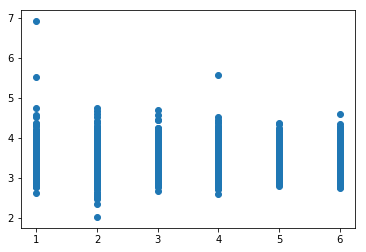

In [6]:
import matplotlib.pyplot as plt

uniq_stores = train.market_id.unique()
print(uniq_stores)
print(len(uniq_stores))
plt.scatter(train['market_id'], np.log10(train['ETA']))
plt.show()

[ 1.  2.  3.  4. nan  5.  6.  7.]


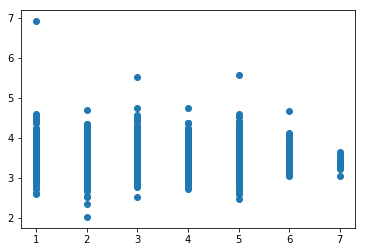

In [7]:
uniq_protocols = train.order_protocol.unique()
print(uniq_protocols)
plt.scatter(train['order_protocol'], np.log10(train['ETA']))
plt.show()

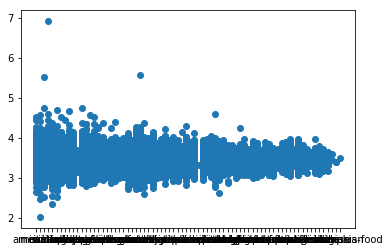

In [8]:
primary_store_df = train[train.store_primary_category.notnull()]
plt.scatter(primary_store_df['store_primary_category'], np.log10(primary_store_df['ETA']))
plt.show()

[  4   1   6   3   2   5   7   8  10   9  13  16  12  25  17  11  24  30
  14  31  35  40  26  28  21  20  15  19  18  23  29  34  42  22  56  36
  57  39  47  45  38  33  27  41 411  32  50  59  51  37  48  44  49  43
  84  64  66]


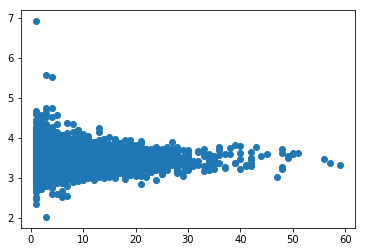

In [9]:
uniq_items = train.total_items.unique()
print(uniq_items)
train = train[train['total_items'] < 60]
plt.scatter(train['total_items'], np.log10(train['ETA']))
plt.show()

[ 33.   1.   6.   2.  10.   7.   8.   3.  16.   5.   4.  24.  12.  19.
  21.  22.  27.  13.  18. 117. 130. 121.  94.  34.  17.  38.  20.  15.
  39.  26.  30.  35.  11.  14.  32.  29.  25.  23.  61.  41.  58.  51.
  57.  60.   9. 108.  72.  89. 112.  55. 126.  80.  69. 125. 113. 105.
  98.  86.  90.  87.  74.  84.  91.  96. 123. 101. 119.  nan 129.  66.
  81.  36.  75.  43.  70.  65.  77. 114.  62. 116. 102.  76.  67.  64.
  88.  73.  63.  46.  28.  47. 110.  97.  42.  79.  49.  50.  37.  92.
 103.  44.  68.  56.   0. 107.  78.  71. 128. 104.  45.  31. 100.  40.
  53. 115. 109.  99.  85.  59. 118.  54.  52.  48. 132. 127. 133. 131.
 149.  93. 111.  95.  82. 136. 120. 134. 124. 106. 137.  83. 152. 147.
 144. 150. 145. 122. 155. 135. 151. 140. 141. 143. 138. 139. 156. 146.
  -2. 160. 158. 154. 153. 148. 142. 157. 171.  -1.  -3. 162. 165. 163.
 164. 159. 169.  -4. 168.]


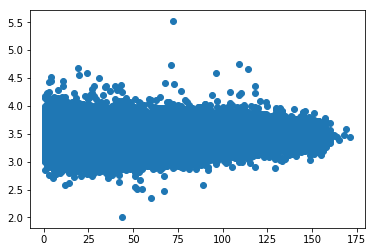

In [10]:
uniq_onshift_dashers = train.total_onshift_dashers.unique()
print(uniq_onshift_dashers)
train = train[train['total_onshift_dashers'] > 0]
plt.scatter(train['total_onshift_dashers'], np.log10(train['ETA']))
plt.show()

[22 21 20  2  3  0  1 19  4 23  5 18  6  7 17 16 15 14]


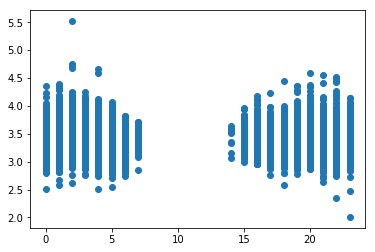

In [11]:
uniq_ordered_hour = train.ordered_hour.unique()
print(uniq_ordered_hour)
plt.scatter(train['ordered_hour'], np.log10(train['ETA']))
plt.show()

[ 21.   2.   0.   9.   7.  18.   1.   4.   3.   8.  12.  26.  11.  30.
  16.  39.  24.  27.  20.  13. 178. 230. 205. 149.  28.  15.  42.  43.
  33.   5.  37.  46.  36.  14.  29.  32.  72.  41.  54.  49.  23.  56.
  60.  10.   6. 154. 144.  34. 100. 173.  80. 202. 124. 130. 181. 188.
 148. 150. 127. 160. 107. 123. 159. 186. 143. 190. 171. 261. 132.  67.
 120. 158.  59.  38.  47.  68.  92.  99. 175. 102. 184. 121.  17.  96.
 111.  22. 131. 141.  89.  48.  65. 194.  73.  45. 203. 134. 126. 183.
  64. 167.  31. 153. 119.  75.  95.  52. 118. 191.  61. 106.  19.  58.
 152. 101.  35. 151.  83. 179.  97.  44.  25. 147. 169. 135. 142. 165.
 172.  91.  40. 237. 198. 220. 219.  78.  90. 138. 168.  85.  81. 212.
 192. 137. 189.  51.  74.  62.  63.  50. 122.  93.  66. 207. 113. 114.
  69.  57.  86.  71.  79.  87.  88.  70.  84. 108.  76.  53.  55.  82.
 110.  98. 185. 225. 104. 145. 247. 232.  77. 133. 103. 174. 164. 193.
 208. 231. 163.  94. 146. 115. 129. 112. 136. 162. 176. 246. 199. 116.
 109. 

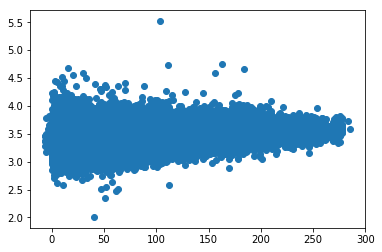

In [12]:
uniq_outstanding_orders = train.total_outstanding_orders.unique()
print(uniq_outstanding_orders)
plt.scatter(train['total_outstanding_orders'], np.log10(train['ETA']))
plt.show()

/Users/dongkim/miniconda3/envs/py37/lib/python3.7/site-packages/pandas/core/series.py:679: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


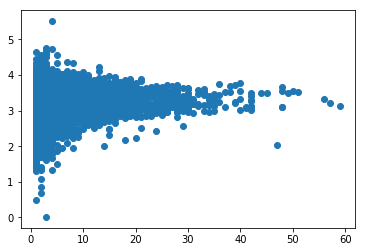

In [13]:
plt.scatter(train['total_items'], np.log10(train['Cooking Time']))
plt.show()

In [14]:
min_delivery_time = np.min(train['ETA'])
print("Mininum delivery time: {}".format(min_delivery_time))
max_delivery_time = np.max(train['ETA'])
print("Maximum delivery time: {}".format(max_delivery_time))
mean_delivery_time = np.mean(train['ETA'])
print("Mean delivery time: {}".format(mean_delivery_time))
median_delivery_time = np.median(train['ETA'])
print("Median delivery time: {}".format(median_delivery_time))
std_delivery_time = np.std(train['ETA'])
print("SD of delivery time: {}".format(std_delivery_time))

Mininum delivery time: 101.0
Maximum delivery time: 332482.0
Mean delivery time: 2854.068741550248
Median delivery time: nan
SD of delivery time: 1394.2525604137493


In [43]:
train.columns

Index(['market_id', 'created_at', 'actual_delivery_time', 'store_id',
       'store_primary_category', 'order_protocol', 'total_items', 'subtotal',
       'num_distinct_items', 'min_item_price', 'max_item_price',
       'total_onshift_dashers', 'total_busy_dashers',
       'total_outstanding_orders', 'estimated_order_place_duration',
       'estimated_store_to_consumer_driving_duration', 'ETA',
       'ordered_at_store', 'ordered_hour', 'Cooking Time'],
      dtype='object')

In [79]:
features = ['total_items', 'total_onshift_dashers',
            'total_busy_dashers', 'total_outstanding_orders',
            'ordered_hour', 'total_items', 'num_distinct_items']

scaled_features = ['subtotal', 'min_item_price', 'max_item_price',
                  'estimated_order_place_duration', 'estimated_store_to_consumer_driving_duration']

train = train[~train.isin([np.nan, 'NaN', np.inf, -np.inf]).any(1)]
ETA = np.log10(train['ETA'])

from sklearn.preprocessing import StandardScaler

scaled_data = train[scaled_features]
feature_data = pd.DataFrame(StandardScaler().fit_transform(scaled_data),
                                columns=scaled_features)
new_index = feature_data.index
non_scaled_data = train[features]
non_scaled_data.reindex(new_index)

,total_items,total_onshift_dashers,total_busy_dashers,total_outstanding_orders,ordered_hour,total_items,num_distinct_items
0,4,33.0,14.0,21.0,22,4,4
1,1,1.0,2.0,2.0,21,1,1
8,4,8.0,6.0,18.0,0,4,3
14,1,5.0,6.0,8.0,3,1,1
15,2,5.0,5.0,7.0,2,2,2
...,...,...,...,...,...,...,...
197423,3,17.0,17.0,23.0,0,3,3
197424,6,12.0,11.0,14.0,0,6,4
197425,5,39.0,41.0,40.0,4,5,3
197426,1,7.0,7.0,12.0,18,1,1


TypeError: can only concatenate str (not "float") to str

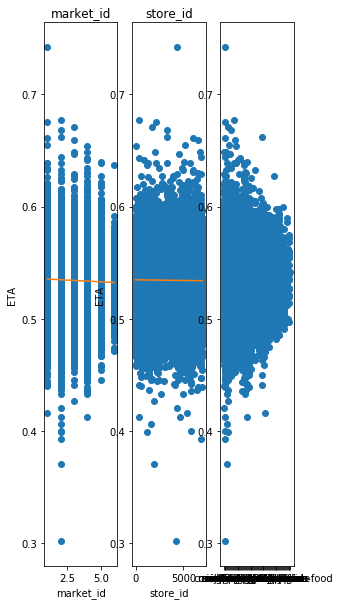

In [26]:
vs.plotWithRegressionLine(feature_data, np.log10(ETA), 'ETA', train)

In [27]:
from scipy.stats import pearsonr

total_items = train['total_items'][train.total_items.notnull()]
print(total_items)
total_onshift_dashers = train.total_onshift_dashers


corr, _ = pearsonr(total_items, ETA)
print('Correlation for total items: %.3f' % corr)

total_onshift_dashers = train.total_onshift_dashers
corr, _ = pearsonr(total_onshift_dashers, total_items)
print('Correlation for total items: %.3f' % corr)

0         4
1         1
8         4
14        1
15        2
         ..
197423    3
197424    6
197425    5
197426    1
197427    4
Name: total_items, Length: 172212, dtype: int64
Correlation for total items: 0.138
Correlation for total items: 0.038


In [28]:
from scipy.stats import spearmanr

corr, _ = spearmanr(total_items, ETA)
print('Spearmans correlation: %.3f' % corr)

Spearmans correlation: 0.159


In [29]:
print(train[features].corrwith(train['estimated_store_to_consumer_driving_duration']))

market_id                                       0.018286
store_id                                       -0.001250
order_protocol                                 -0.010428
subtotal                                        0.037118
min_item_price                                  0.004532
max_item_price                                  0.029229
estimated_order_place_duration                 -0.023048
estimated_store_to_consumer_driving_duration    1.000000
total_items                                     0.006053
total_onshift_dashers                           0.046582
total_busy_dashers                              0.045229
total_outstanding_orders                        0.040086
ordered_hour                                   -0.026308
total_items                                     0.006053
num_distinct_items                              0.023423
dtype: float64


In [30]:
from sklearn.model_selection import train_test_split

# TODO: Shuffle and split the data into training and testing subsets
X_train, X_test, y_train, y_test = train_test_split(feature_data, ETA, test_size=0.30, random_state=45)

# Success
print("Training and testing split was successful.")

Training and testing split was successful.


/Users/dongkim/miniconda3/envs/py37/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/dongkim/miniconda3/envs/py37/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/dongkim/miniconda3/envs/py37/lib/python3.7/site-packages/sklearn/tree/_classes.py", line 1246, in fit
    X_idx_sorted=X_idx_sorted)
  File "/Users/dongkim/miniconda3/envs/py37/lib/python3.7/site-packages/sklearn/tree/_classes.py", line 158, in fit
    check_y_params))
  File "/Users/dongkim/miniconda3/envs/py37/lib/python3.7/site-packages/sklearn/base.py", line 429, in _validate_data
    X = check_array(X, **check_X_params)
  File "/Users/dongkim/miniconda3/envs/py37/lib/python3.7/site-packages/sklearn/utils/valida

/Users/dongkim/miniconda3/envs/py37/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/dongkim/miniconda3/envs/py37/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/dongkim/miniconda3/envs/py37/lib/python3.7/site-packages/sklearn/tree/_classes.py", line 1246, in fit
    X_idx_sorted=X_idx_sorted)
  File "/Users/dongkim/miniconda3/envs/py37/lib/python3.7/site-packages/sklearn/tree/_classes.py", line 158, in fit
    check_y_params))
  File "/Users/dongkim/miniconda3/envs/py37/lib/python3.7/site-packages/sklearn/base.py", line 429, in _validate_data
    X = check_array(X, **check_X_params)
  File "/Users/dongkim/miniconda3/envs/py37/lib/python3.7/site-packages/sklearn/utils/valida

/Users/dongkim/miniconda3/envs/py37/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/dongkim/miniconda3/envs/py37/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/dongkim/miniconda3/envs/py37/lib/python3.7/site-packages/sklearn/tree/_classes.py", line 1246, in fit
    X_idx_sorted=X_idx_sorted)
  File "/Users/dongkim/miniconda3/envs/py37/lib/python3.7/site-packages/sklearn/tree/_classes.py", line 158, in fit
    check_y_params))
  File "/Users/dongkim/miniconda3/envs/py37/lib/python3.7/site-packages/sklearn/base.py", line 429, in _validate_data
    X = check_array(X, **check_X_params)
  File "/Users/dongkim/miniconda3/envs/py37/lib/python3.7/site-packages/sklearn/utils/valida

/Users/dongkim/miniconda3/envs/py37/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/dongkim/miniconda3/envs/py37/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/dongkim/miniconda3/envs/py37/lib/python3.7/site-packages/sklearn/tree/_classes.py", line 1246, in fit
    X_idx_sorted=X_idx_sorted)
  File "/Users/dongkim/miniconda3/envs/py37/lib/python3.7/site-packages/sklearn/tree/_classes.py", line 158, in fit
    check_y_params))
  File "/Users/dongkim/miniconda3/envs/py37/lib/python3.7/site-packages/sklearn/base.py", line 429, in _validate_data
    X = check_array(X, **check_X_params)
  File "/Users/dongkim/miniconda3/envs/py37/lib/python3.7/site-packages/sklearn/utils/valida

/Users/dongkim/miniconda3/envs/py37/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/dongkim/miniconda3/envs/py37/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/dongkim/miniconda3/envs/py37/lib/python3.7/site-packages/sklearn/tree/_classes.py", line 1246, in fit
    X_idx_sorted=X_idx_sorted)
  File "/Users/dongkim/miniconda3/envs/py37/lib/python3.7/site-packages/sklearn/tree/_classes.py", line 158, in fit
    check_y_params))
  File "/Users/dongkim/miniconda3/envs/py37/lib/python3.7/site-packages/sklearn/base.py", line 429, in _validate_data
    X = check_array(X, **check_X_params)
  File "/Users/dongkim/miniconda3/envs/py37/lib/python3.7/site-packages/sklearn/utils/valida

/Users/dongkim/miniconda3/envs/py37/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/dongkim/miniconda3/envs/py37/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/dongkim/miniconda3/envs/py37/lib/python3.7/site-packages/sklearn/tree/_classes.py", line 1246, in fit
    X_idx_sorted=X_idx_sorted)
  File "/Users/dongkim/miniconda3/envs/py37/lib/python3.7/site-packages/sklearn/tree/_classes.py", line 158, in fit
    check_y_params))
  File "/Users/dongkim/miniconda3/envs/py37/lib/python3.7/site-packages/sklearn/base.py", line 429, in _validate_data
    X = check_array(X, **check_X_params)
  File "/Users/dongkim/miniconda3/envs/py37/lib/python3.7/site-packages/sklearn/utils/valida

/Users/dongkim/miniconda3/envs/py37/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/dongkim/miniconda3/envs/py37/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/dongkim/miniconda3/envs/py37/lib/python3.7/site-packages/sklearn/tree/_classes.py", line 1246, in fit
    X_idx_sorted=X_idx_sorted)
  File "/Users/dongkim/miniconda3/envs/py37/lib/python3.7/site-packages/sklearn/tree/_classes.py", line 158, in fit
    check_y_params))
  File "/Users/dongkim/miniconda3/envs/py37/lib/python3.7/site-packages/sklearn/base.py", line 429, in _validate_data
    X = check_array(X, **check_X_params)
  File "/Users/dongkim/miniconda3/envs/py37/lib/python3.7/site-packages/sklearn/utils/valida

/Users/dongkim/miniconda3/envs/py37/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/dongkim/miniconda3/envs/py37/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/dongkim/miniconda3/envs/py37/lib/python3.7/site-packages/sklearn/tree/_classes.py", line 1246, in fit
    X_idx_sorted=X_idx_sorted)
  File "/Users/dongkim/miniconda3/envs/py37/lib/python3.7/site-packages/sklearn/tree/_classes.py", line 158, in fit
    check_y_params))
  File "/Users/dongkim/miniconda3/envs/py37/lib/python3.7/site-packages/sklearn/base.py", line 429, in _validate_data
    X = check_array(X, **check_X_params)
  File "/Users/dongkim/miniconda3/envs/py37/lib/python3.7/site-packages/sklearn/utils/valida

/Users/dongkim/miniconda3/envs/py37/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/dongkim/miniconda3/envs/py37/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/dongkim/miniconda3/envs/py37/lib/python3.7/site-packages/sklearn/tree/_classes.py", line 1246, in fit
    X_idx_sorted=X_idx_sorted)
  File "/Users/dongkim/miniconda3/envs/py37/lib/python3.7/site-packages/sklearn/tree/_classes.py", line 158, in fit
    check_y_params))
  File "/Users/dongkim/miniconda3/envs/py37/lib/python3.7/site-packages/sklearn/base.py", line 429, in _validate_data
    X = check_array(X, **check_X_params)
  File "/Users/dongkim/miniconda3/envs/py37/lib/python3.7/site-packages/sklearn/utils/valida

/Users/dongkim/miniconda3/envs/py37/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/dongkim/miniconda3/envs/py37/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/dongkim/miniconda3/envs/py37/lib/python3.7/site-packages/sklearn/tree/_classes.py", line 1246, in fit
    X_idx_sorted=X_idx_sorted)
  File "/Users/dongkim/miniconda3/envs/py37/lib/python3.7/site-packages/sklearn/tree/_classes.py", line 158, in fit
    check_y_params))
  File "/Users/dongkim/miniconda3/envs/py37/lib/python3.7/site-packages/sklearn/base.py", line 429, in _validate_data
    X = check_array(X, **check_X_params)
  File "/Users/dongkim/miniconda3/envs/py37/lib/python3.7/site-packages/sklearn/utils/valida

/Users/dongkim/miniconda3/envs/py37/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/dongkim/miniconda3/envs/py37/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/dongkim/miniconda3/envs/py37/lib/python3.7/site-packages/sklearn/tree/_classes.py", line 1246, in fit
    X_idx_sorted=X_idx_sorted)
  File "/Users/dongkim/miniconda3/envs/py37/lib/python3.7/site-packages/sklearn/tree/_classes.py", line 158, in fit
    check_y_params))
  File "/Users/dongkim/miniconda3/envs/py37/lib/python3.7/site-packages/sklearn/base.py", line 429, in _validate_data
    X = check_array(X, **check_X_params)
  File "/Users/dongkim/miniconda3/envs/py37/lib/python3.7/site-packages/sklearn/utils/valida

/Users/dongkim/miniconda3/envs/py37/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/dongkim/miniconda3/envs/py37/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/dongkim/miniconda3/envs/py37/lib/python3.7/site-packages/sklearn/tree/_classes.py", line 1246, in fit
    X_idx_sorted=X_idx_sorted)
  File "/Users/dongkim/miniconda3/envs/py37/lib/python3.7/site-packages/sklearn/tree/_classes.py", line 158, in fit
    check_y_params))
  File "/Users/dongkim/miniconda3/envs/py37/lib/python3.7/site-packages/sklearn/base.py", line 429, in _validate_data
    X = check_array(X, **check_X_params)
  File "/Users/dongkim/miniconda3/envs/py37/lib/python3.7/site-packages/sklearn/utils/valida

/Users/dongkim/miniconda3/envs/py37/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/dongkim/miniconda3/envs/py37/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/dongkim/miniconda3/envs/py37/lib/python3.7/site-packages/sklearn/tree/_classes.py", line 1246, in fit
    X_idx_sorted=X_idx_sorted)
  File "/Users/dongkim/miniconda3/envs/py37/lib/python3.7/site-packages/sklearn/tree/_classes.py", line 158, in fit
    check_y_params))
  File "/Users/dongkim/miniconda3/envs/py37/lib/python3.7/site-packages/sklearn/base.py", line 429, in _validate_data
    X = check_array(X, **check_X_params)
  File "/Users/dongkim/miniconda3/envs/py37/lib/python3.7/site-packages/sklearn/utils/valida

/Users/dongkim/miniconda3/envs/py37/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/dongkim/miniconda3/envs/py37/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/dongkim/miniconda3/envs/py37/lib/python3.7/site-packages/sklearn/tree/_classes.py", line 1246, in fit
    X_idx_sorted=X_idx_sorted)
  File "/Users/dongkim/miniconda3/envs/py37/lib/python3.7/site-packages/sklearn/tree/_classes.py", line 158, in fit
    check_y_params))
  File "/Users/dongkim/miniconda3/envs/py37/lib/python3.7/site-packages/sklearn/base.py", line 429, in _validate_data
    X = check_array(X, **check_X_params)
  File "/Users/dongkim/miniconda3/envs/py37/lib/python3.7/site-packages/sklearn/utils/valida

/Users/dongkim/miniconda3/envs/py37/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/dongkim/miniconda3/envs/py37/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/dongkim/miniconda3/envs/py37/lib/python3.7/site-packages/sklearn/tree/_classes.py", line 1246, in fit
    X_idx_sorted=X_idx_sorted)
  File "/Users/dongkim/miniconda3/envs/py37/lib/python3.7/site-packages/sklearn/tree/_classes.py", line 158, in fit
    check_y_params))
  File "/Users/dongkim/miniconda3/envs/py37/lib/python3.7/site-packages/sklearn/base.py", line 429, in _validate_data
    X = check_array(X, **check_X_params)
  File "/Users/dongkim/miniconda3/envs/py37/lib/python3.7/site-packages/sklearn/utils/valida

/Users/dongkim/miniconda3/envs/py37/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/dongkim/miniconda3/envs/py37/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/dongkim/miniconda3/envs/py37/lib/python3.7/site-packages/sklearn/tree/_classes.py", line 1246, in fit
    X_idx_sorted=X_idx_sorted)
  File "/Users/dongkim/miniconda3/envs/py37/lib/python3.7/site-packages/sklearn/tree/_classes.py", line 158, in fit
    check_y_params))
  File "/Users/dongkim/miniconda3/envs/py37/lib/python3.7/site-packages/sklearn/base.py", line 429, in _validate_data
    X = check_array(X, **check_X_params)
  File "/Users/dongkim/miniconda3/envs/py37/lib/python3.7/site-packages/sklearn/utils/valida

/Users/dongkim/miniconda3/envs/py37/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/dongkim/miniconda3/envs/py37/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/dongkim/miniconda3/envs/py37/lib/python3.7/site-packages/sklearn/tree/_classes.py", line 1246, in fit
    X_idx_sorted=X_idx_sorted)
  File "/Users/dongkim/miniconda3/envs/py37/lib/python3.7/site-packages/sklearn/tree/_classes.py", line 158, in fit
    check_y_params))
  File "/Users/dongkim/miniconda3/envs/py37/lib/python3.7/site-packages/sklearn/base.py", line 429, in _validate_data
    X = check_array(X, **check_X_params)
  File "/Users/dongkim/miniconda3/envs/py37/lib/python3.7/site-packages/sklearn/utils/valida

/Users/dongkim/miniconda3/envs/py37/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/dongkim/miniconda3/envs/py37/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/dongkim/miniconda3/envs/py37/lib/python3.7/site-packages/sklearn/tree/_classes.py", line 1246, in fit
    X_idx_sorted=X_idx_sorted)
  File "/Users/dongkim/miniconda3/envs/py37/lib/python3.7/site-packages/sklearn/tree/_classes.py", line 158, in fit
    check_y_params))
  File "/Users/dongkim/miniconda3/envs/py37/lib/python3.7/site-packages/sklearn/base.py", line 429, in _validate_data
    X = check_array(X, **check_X_params)
  File "/Users/dongkim/miniconda3/envs/py37/lib/python3.7/site-packages/sklearn/utils/valida

/Users/dongkim/miniconda3/envs/py37/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/dongkim/miniconda3/envs/py37/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/dongkim/miniconda3/envs/py37/lib/python3.7/site-packages/sklearn/tree/_classes.py", line 1246, in fit
    X_idx_sorted=X_idx_sorted)
  File "/Users/dongkim/miniconda3/envs/py37/lib/python3.7/site-packages/sklearn/tree/_classes.py", line 158, in fit
    check_y_params))
  File "/Users/dongkim/miniconda3/envs/py37/lib/python3.7/site-packages/sklearn/base.py", line 429, in _validate_data
    X = check_array(X, **check_X_params)
  File "/Users/dongkim/miniconda3/envs/py37/lib/python3.7/site-packages/sklearn/utils/valida

/Users/dongkim/miniconda3/envs/py37/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/dongkim/miniconda3/envs/py37/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/dongkim/miniconda3/envs/py37/lib/python3.7/site-packages/sklearn/tree/_classes.py", line 1246, in fit
    X_idx_sorted=X_idx_sorted)
  File "/Users/dongkim/miniconda3/envs/py37/lib/python3.7/site-packages/sklearn/tree/_classes.py", line 158, in fit
    check_y_params))
  File "/Users/dongkim/miniconda3/envs/py37/lib/python3.7/site-packages/sklearn/base.py", line 429, in _validate_data
    X = check_array(X, **check_X_params)
  File "/Users/dongkim/miniconda3/envs/py37/lib/python3.7/site-packages/sklearn/utils/valida

/Users/dongkim/miniconda3/envs/py37/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/dongkim/miniconda3/envs/py37/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/dongkim/miniconda3/envs/py37/lib/python3.7/site-packages/sklearn/tree/_classes.py", line 1246, in fit
    X_idx_sorted=X_idx_sorted)
  File "/Users/dongkim/miniconda3/envs/py37/lib/python3.7/site-packages/sklearn/tree/_classes.py", line 158, in fit
    check_y_params))
  File "/Users/dongkim/miniconda3/envs/py37/lib/python3.7/site-packages/sklearn/base.py", line 429, in _validate_data
    X = check_array(X, **check_X_params)
  File "/Users/dongkim/miniconda3/envs/py37/lib/python3.7/site-packages/sklearn/utils/valida

/Users/dongkim/miniconda3/envs/py37/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/dongkim/miniconda3/envs/py37/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/dongkim/miniconda3/envs/py37/lib/python3.7/site-packages/sklearn/tree/_classes.py", line 1246, in fit
    X_idx_sorted=X_idx_sorted)
  File "/Users/dongkim/miniconda3/envs/py37/lib/python3.7/site-packages/sklearn/tree/_classes.py", line 158, in fit
    check_y_params))
  File "/Users/dongkim/miniconda3/envs/py37/lib/python3.7/site-packages/sklearn/base.py", line 429, in _validate_data
    X = check_array(X, **check_X_params)
  File "/Users/dongkim/miniconda3/envs/py37/lib/python3.7/site-packages/sklearn/utils/valida

/Users/dongkim/miniconda3/envs/py37/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/dongkim/miniconda3/envs/py37/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/dongkim/miniconda3/envs/py37/lib/python3.7/site-packages/sklearn/tree/_classes.py", line 1246, in fit
    X_idx_sorted=X_idx_sorted)
  File "/Users/dongkim/miniconda3/envs/py37/lib/python3.7/site-packages/sklearn/tree/_classes.py", line 158, in fit
    check_y_params))
  File "/Users/dongkim/miniconda3/envs/py37/lib/python3.7/site-packages/sklearn/base.py", line 429, in _validate_data
    X = check_array(X, **check_X_params)
  File "/Users/dongkim/miniconda3/envs/py37/lib/python3.7/site-packages/sklearn/utils/valida

/Users/dongkim/miniconda3/envs/py37/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/dongkim/miniconda3/envs/py37/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/dongkim/miniconda3/envs/py37/lib/python3.7/site-packages/sklearn/tree/_classes.py", line 1246, in fit
    X_idx_sorted=X_idx_sorted)
  File "/Users/dongkim/miniconda3/envs/py37/lib/python3.7/site-packages/sklearn/tree/_classes.py", line 158, in fit
    check_y_params))
  File "/Users/dongkim/miniconda3/envs/py37/lib/python3.7/site-packages/sklearn/base.py", line 429, in _validate_data
    X = check_array(X, **check_X_params)
  File "/Users/dongkim/miniconda3/envs/py37/lib/python3.7/site-packages/sklearn/utils/valida

/Users/dongkim/miniconda3/envs/py37/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/dongkim/miniconda3/envs/py37/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/dongkim/miniconda3/envs/py37/lib/python3.7/site-packages/sklearn/tree/_classes.py", line 1246, in fit
    X_idx_sorted=X_idx_sorted)
  File "/Users/dongkim/miniconda3/envs/py37/lib/python3.7/site-packages/sklearn/tree/_classes.py", line 158, in fit
    check_y_params))
  File "/Users/dongkim/miniconda3/envs/py37/lib/python3.7/site-packages/sklearn/base.py", line 429, in _validate_data
    X = check_array(X, **check_X_params)
  File "/Users/dongkim/miniconda3/envs/py37/lib/python3.7/site-packages/sklearn/utils/valida

/Users/dongkim/miniconda3/envs/py37/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/dongkim/miniconda3/envs/py37/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/dongkim/miniconda3/envs/py37/lib/python3.7/site-packages/sklearn/tree/_classes.py", line 1246, in fit
    X_idx_sorted=X_idx_sorted)
  File "/Users/dongkim/miniconda3/envs/py37/lib/python3.7/site-packages/sklearn/tree/_classes.py", line 158, in fit
    check_y_params))
  File "/Users/dongkim/miniconda3/envs/py37/lib/python3.7/site-packages/sklearn/base.py", line 429, in _validate_data
    X = check_array(X, **check_X_params)
  File "/Users/dongkim/miniconda3/envs/py37/lib/python3.7/site-packages/sklearn/utils/valida

/Users/dongkim/miniconda3/envs/py37/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/dongkim/miniconda3/envs/py37/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/dongkim/miniconda3/envs/py37/lib/python3.7/site-packages/sklearn/tree/_classes.py", line 1246, in fit
    X_idx_sorted=X_idx_sorted)
  File "/Users/dongkim/miniconda3/envs/py37/lib/python3.7/site-packages/sklearn/tree/_classes.py", line 158, in fit
    check_y_params))
  File "/Users/dongkim/miniconda3/envs/py37/lib/python3.7/site-packages/sklearn/base.py", line 429, in _validate_data
    X = check_array(X, **check_X_params)
  File "/Users/dongkim/miniconda3/envs/py37/lib/python3.7/site-packages/sklearn/utils/valida

/Users/dongkim/miniconda3/envs/py37/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/dongkim/miniconda3/envs/py37/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/dongkim/miniconda3/envs/py37/lib/python3.7/site-packages/sklearn/tree/_classes.py", line 1246, in fit
    X_idx_sorted=X_idx_sorted)
  File "/Users/dongkim/miniconda3/envs/py37/lib/python3.7/site-packages/sklearn/tree/_classes.py", line 158, in fit
    check_y_params))
  File "/Users/dongkim/miniconda3/envs/py37/lib/python3.7/site-packages/sklearn/base.py", line 429, in _validate_data
    X = check_array(X, **check_X_params)
  File "/Users/dongkim/miniconda3/envs/py37/lib/python3.7/site-packages/sklearn/utils/valida

/Users/dongkim/miniconda3/envs/py37/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/dongkim/miniconda3/envs/py37/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/dongkim/miniconda3/envs/py37/lib/python3.7/site-packages/sklearn/tree/_classes.py", line 1246, in fit
    X_idx_sorted=X_idx_sorted)
  File "/Users/dongkim/miniconda3/envs/py37/lib/python3.7/site-packages/sklearn/tree/_classes.py", line 158, in fit
    check_y_params))
  File "/Users/dongkim/miniconda3/envs/py37/lib/python3.7/site-packages/sklearn/base.py", line 429, in _validate_data
    X = check_array(X, **check_X_params)
  File "/Users/dongkim/miniconda3/envs/py37/lib/python3.7/site-packages/sklearn/utils/valida

/Users/dongkim/miniconda3/envs/py37/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/dongkim/miniconda3/envs/py37/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/dongkim/miniconda3/envs/py37/lib/python3.7/site-packages/sklearn/tree/_classes.py", line 1246, in fit
    X_idx_sorted=X_idx_sorted)
  File "/Users/dongkim/miniconda3/envs/py37/lib/python3.7/site-packages/sklearn/tree/_classes.py", line 158, in fit
    check_y_params))
  File "/Users/dongkim/miniconda3/envs/py37/lib/python3.7/site-packages/sklearn/base.py", line 429, in _validate_data
    X = check_array(X, **check_X_params)
  File "/Users/dongkim/miniconda3/envs/py37/lib/python3.7/site-packages/sklearn/utils/valida

/Users/dongkim/miniconda3/envs/py37/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/dongkim/miniconda3/envs/py37/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/dongkim/miniconda3/envs/py37/lib/python3.7/site-packages/sklearn/tree/_classes.py", line 1246, in fit
    X_idx_sorted=X_idx_sorted)
  File "/Users/dongkim/miniconda3/envs/py37/lib/python3.7/site-packages/sklearn/tree/_classes.py", line 158, in fit
    check_y_params))
  File "/Users/dongkim/miniconda3/envs/py37/lib/python3.7/site-packages/sklearn/base.py", line 429, in _validate_data
    X = check_array(X, **check_X_params)
  File "/Users/dongkim/miniconda3/envs/py37/lib/python3.7/site-packages/sklearn/utils/valida

/Users/dongkim/miniconda3/envs/py37/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/dongkim/miniconda3/envs/py37/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/dongkim/miniconda3/envs/py37/lib/python3.7/site-packages/sklearn/tree/_classes.py", line 1246, in fit
    X_idx_sorted=X_idx_sorted)
  File "/Users/dongkim/miniconda3/envs/py37/lib/python3.7/site-packages/sklearn/tree/_classes.py", line 158, in fit
    check_y_params))
  File "/Users/dongkim/miniconda3/envs/py37/lib/python3.7/site-packages/sklearn/base.py", line 429, in _validate_data
    X = check_array(X, **check_X_params)
  File "/Users/dongkim/miniconda3/envs/py37/lib/python3.7/site-packages/sklearn/utils/valida

/Users/dongkim/miniconda3/envs/py37/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/dongkim/miniconda3/envs/py37/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/dongkim/miniconda3/envs/py37/lib/python3.7/site-packages/sklearn/tree/_classes.py", line 1246, in fit
    X_idx_sorted=X_idx_sorted)
  File "/Users/dongkim/miniconda3/envs/py37/lib/python3.7/site-packages/sklearn/tree/_classes.py", line 158, in fit
    check_y_params))
  File "/Users/dongkim/miniconda3/envs/py37/lib/python3.7/site-packages/sklearn/base.py", line 429, in _validate_data
    X = check_array(X, **check_X_params)
  File "/Users/dongkim/miniconda3/envs/py37/lib/python3.7/site-packages/sklearn/utils/valida

/Users/dongkim/miniconda3/envs/py37/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/dongkim/miniconda3/envs/py37/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/dongkim/miniconda3/envs/py37/lib/python3.7/site-packages/sklearn/tree/_classes.py", line 1246, in fit
    X_idx_sorted=X_idx_sorted)
  File "/Users/dongkim/miniconda3/envs/py37/lib/python3.7/site-packages/sklearn/tree/_classes.py", line 158, in fit
    check_y_params))
  File "/Users/dongkim/miniconda3/envs/py37/lib/python3.7/site-packages/sklearn/base.py", line 429, in _validate_data
    X = check_array(X, **check_X_params)
  File "/Users/dongkim/miniconda3/envs/py37/lib/python3.7/site-packages/sklearn/utils/valida

/Users/dongkim/miniconda3/envs/py37/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/dongkim/miniconda3/envs/py37/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/dongkim/miniconda3/envs/py37/lib/python3.7/site-packages/sklearn/tree/_classes.py", line 1246, in fit
    X_idx_sorted=X_idx_sorted)
  File "/Users/dongkim/miniconda3/envs/py37/lib/python3.7/site-packages/sklearn/tree/_classes.py", line 158, in fit
    check_y_params))
  File "/Users/dongkim/miniconda3/envs/py37/lib/python3.7/site-packages/sklearn/base.py", line 429, in _validate_data
    X = check_array(X, **check_X_params)
  File "/Users/dongkim/miniconda3/envs/py37/lib/python3.7/site-packages/sklearn/utils/valida

/Users/dongkim/miniconda3/envs/py37/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/dongkim/miniconda3/envs/py37/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/dongkim/miniconda3/envs/py37/lib/python3.7/site-packages/sklearn/tree/_classes.py", line 1246, in fit
    X_idx_sorted=X_idx_sorted)
  File "/Users/dongkim/miniconda3/envs/py37/lib/python3.7/site-packages/sklearn/tree/_classes.py", line 158, in fit
    check_y_params))
  File "/Users/dongkim/miniconda3/envs/py37/lib/python3.7/site-packages/sklearn/base.py", line 429, in _validate_data
    X = check_array(X, **check_X_params)
  File "/Users/dongkim/miniconda3/envs/py37/lib/python3.7/site-packages/sklearn/utils/valida

/Users/dongkim/miniconda3/envs/py37/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/dongkim/miniconda3/envs/py37/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/dongkim/miniconda3/envs/py37/lib/python3.7/site-packages/sklearn/tree/_classes.py", line 1246, in fit
    X_idx_sorted=X_idx_sorted)
  File "/Users/dongkim/miniconda3/envs/py37/lib/python3.7/site-packages/sklearn/tree/_classes.py", line 158, in fit
    check_y_params))
  File "/Users/dongkim/miniconda3/envs/py37/lib/python3.7/site-packages/sklearn/base.py", line 429, in _validate_data
    X = check_array(X, **check_X_params)
  File "/Users/dongkim/miniconda3/envs/py37/lib/python3.7/site-packages/sklearn/utils/valida

/Users/dongkim/miniconda3/envs/py37/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/dongkim/miniconda3/envs/py37/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/dongkim/miniconda3/envs/py37/lib/python3.7/site-packages/sklearn/tree/_classes.py", line 1246, in fit
    X_idx_sorted=X_idx_sorted)
  File "/Users/dongkim/miniconda3/envs/py37/lib/python3.7/site-packages/sklearn/tree/_classes.py", line 158, in fit
    check_y_params))
  File "/Users/dongkim/miniconda3/envs/py37/lib/python3.7/site-packages/sklearn/base.py", line 429, in _validate_data
    X = check_array(X, **check_X_params)
  File "/Users/dongkim/miniconda3/envs/py37/lib/python3.7/site-packages/sklearn/utils/valida

/Users/dongkim/miniconda3/envs/py37/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/dongkim/miniconda3/envs/py37/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/dongkim/miniconda3/envs/py37/lib/python3.7/site-packages/sklearn/tree/_classes.py", line 1246, in fit
    X_idx_sorted=X_idx_sorted)
  File "/Users/dongkim/miniconda3/envs/py37/lib/python3.7/site-packages/sklearn/tree/_classes.py", line 158, in fit
    check_y_params))
  File "/Users/dongkim/miniconda3/envs/py37/lib/python3.7/site-packages/sklearn/base.py", line 429, in _validate_data
    X = check_array(X, **check_X_params)
  File "/Users/dongkim/miniconda3/envs/py37/lib/python3.7/site-packages/sklearn/utils/valida

/Users/dongkim/miniconda3/envs/py37/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/dongkim/miniconda3/envs/py37/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/dongkim/miniconda3/envs/py37/lib/python3.7/site-packages/sklearn/tree/_classes.py", line 1246, in fit
    X_idx_sorted=X_idx_sorted)
  File "/Users/dongkim/miniconda3/envs/py37/lib/python3.7/site-packages/sklearn/tree/_classes.py", line 158, in fit
    check_y_params))
  File "/Users/dongkim/miniconda3/envs/py37/lib/python3.7/site-packages/sklearn/base.py", line 429, in _validate_data
    X = check_array(X, **check_X_params)
  File "/Users/dongkim/miniconda3/envs/py37/lib/python3.7/site-packages/sklearn/utils/valida

/Users/dongkim/miniconda3/envs/py37/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/dongkim/miniconda3/envs/py37/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/dongkim/miniconda3/envs/py37/lib/python3.7/site-packages/sklearn/tree/_classes.py", line 1246, in fit
    X_idx_sorted=X_idx_sorted)
  File "/Users/dongkim/miniconda3/envs/py37/lib/python3.7/site-packages/sklearn/tree/_classes.py", line 158, in fit
    check_y_params))
  File "/Users/dongkim/miniconda3/envs/py37/lib/python3.7/site-packages/sklearn/base.py", line 429, in _validate_data
    X = check_array(X, **check_X_params)
  File "/Users/dongkim/miniconda3/envs/py37/lib/python3.7/site-packages/sklearn/utils/valida

/Users/dongkim/miniconda3/envs/py37/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/dongkim/miniconda3/envs/py37/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/dongkim/miniconda3/envs/py37/lib/python3.7/site-packages/sklearn/tree/_classes.py", line 1246, in fit
    X_idx_sorted=X_idx_sorted)
  File "/Users/dongkim/miniconda3/envs/py37/lib/python3.7/site-packages/sklearn/tree/_classes.py", line 158, in fit
    check_y_params))
  File "/Users/dongkim/miniconda3/envs/py37/lib/python3.7/site-packages/sklearn/base.py", line 429, in _validate_data
    X = check_array(X, **check_X_params)
  File "/Users/dongkim/miniconda3/envs/py37/lib/python3.7/site-packages/sklearn/utils/valida

/Users/dongkim/miniconda3/envs/py37/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/dongkim/miniconda3/envs/py37/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/dongkim/miniconda3/envs/py37/lib/python3.7/site-packages/sklearn/tree/_classes.py", line 1246, in fit
    X_idx_sorted=X_idx_sorted)
  File "/Users/dongkim/miniconda3/envs/py37/lib/python3.7/site-packages/sklearn/tree/_classes.py", line 158, in fit
    check_y_params))
  File "/Users/dongkim/miniconda3/envs/py37/lib/python3.7/site-packages/sklearn/base.py", line 429, in _validate_data
    X = check_array(X, **check_X_params)
  File "/Users/dongkim/miniconda3/envs/py37/lib/python3.7/site-packages/sklearn/utils/valida

/Users/dongkim/miniconda3/envs/py37/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/dongkim/miniconda3/envs/py37/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/dongkim/miniconda3/envs/py37/lib/python3.7/site-packages/sklearn/tree/_classes.py", line 1246, in fit
    X_idx_sorted=X_idx_sorted)
  File "/Users/dongkim/miniconda3/envs/py37/lib/python3.7/site-packages/sklearn/tree/_classes.py", line 158, in fit
    check_y_params))
  File "/Users/dongkim/miniconda3/envs/py37/lib/python3.7/site-packages/sklearn/base.py", line 429, in _validate_data
    X = check_array(X, **check_X_params)
  File "/Users/dongkim/miniconda3/envs/py37/lib/python3.7/site-packages/sklearn/utils/valida

/Users/dongkim/miniconda3/envs/py37/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/dongkim/miniconda3/envs/py37/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/dongkim/miniconda3/envs/py37/lib/python3.7/site-packages/sklearn/tree/_classes.py", line 1246, in fit
    X_idx_sorted=X_idx_sorted)
  File "/Users/dongkim/miniconda3/envs/py37/lib/python3.7/site-packages/sklearn/tree/_classes.py", line 158, in fit
    check_y_params))
  File "/Users/dongkim/miniconda3/envs/py37/lib/python3.7/site-packages/sklearn/base.py", line 429, in _validate_data
    X = check_array(X, **check_X_params)
  File "/Users/dongkim/miniconda3/envs/py37/lib/python3.7/site-packages/sklearn/utils/valida

/Users/dongkim/miniconda3/envs/py37/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/dongkim/miniconda3/envs/py37/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/dongkim/miniconda3/envs/py37/lib/python3.7/site-packages/sklearn/tree/_classes.py", line 1246, in fit
    X_idx_sorted=X_idx_sorted)
  File "/Users/dongkim/miniconda3/envs/py37/lib/python3.7/site-packages/sklearn/tree/_classes.py", line 158, in fit
    check_y_params))
  File "/Users/dongkim/miniconda3/envs/py37/lib/python3.7/site-packages/sklearn/base.py", line 429, in _validate_data
    X = check_array(X, **check_X_params)
  File "/Users/dongkim/miniconda3/envs/py37/lib/python3.7/site-packages/sklearn/utils/valida

/Users/dongkim/miniconda3/envs/py37/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/dongkim/miniconda3/envs/py37/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/dongkim/miniconda3/envs/py37/lib/python3.7/site-packages/sklearn/tree/_classes.py", line 1246, in fit
    X_idx_sorted=X_idx_sorted)
  File "/Users/dongkim/miniconda3/envs/py37/lib/python3.7/site-packages/sklearn/tree/_classes.py", line 158, in fit
    check_y_params))
  File "/Users/dongkim/miniconda3/envs/py37/lib/python3.7/site-packages/sklearn/base.py", line 429, in _validate_data
    X = check_array(X, **check_X_params)
  File "/Users/dongkim/miniconda3/envs/py37/lib/python3.7/site-packages/sklearn/utils/valida

/Users/dongkim/miniconda3/envs/py37/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/dongkim/miniconda3/envs/py37/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/dongkim/miniconda3/envs/py37/lib/python3.7/site-packages/sklearn/tree/_classes.py", line 1246, in fit
    X_idx_sorted=X_idx_sorted)
  File "/Users/dongkim/miniconda3/envs/py37/lib/python3.7/site-packages/sklearn/tree/_classes.py", line 158, in fit
    check_y_params))
  File "/Users/dongkim/miniconda3/envs/py37/lib/python3.7/site-packages/sklearn/base.py", line 429, in _validate_data
    X = check_array(X, **check_X_params)
  File "/Users/dongkim/miniconda3/envs/py37/lib/python3.7/site-packages/sklearn/utils/valida

/Users/dongkim/miniconda3/envs/py37/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/dongkim/miniconda3/envs/py37/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/dongkim/miniconda3/envs/py37/lib/python3.7/site-packages/sklearn/tree/_classes.py", line 1246, in fit
    X_idx_sorted=X_idx_sorted)
  File "/Users/dongkim/miniconda3/envs/py37/lib/python3.7/site-packages/sklearn/tree/_classes.py", line 158, in fit
    check_y_params))
  File "/Users/dongkim/miniconda3/envs/py37/lib/python3.7/site-packages/sklearn/base.py", line 429, in _validate_data
    X = check_array(X, **check_X_params)
  File "/Users/dongkim/miniconda3/envs/py37/lib/python3.7/site-packages/sklearn/utils/valida

/Users/dongkim/miniconda3/envs/py37/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/dongkim/miniconda3/envs/py37/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/dongkim/miniconda3/envs/py37/lib/python3.7/site-packages/sklearn/tree/_classes.py", line 1246, in fit
    X_idx_sorted=X_idx_sorted)
  File "/Users/dongkim/miniconda3/envs/py37/lib/python3.7/site-packages/sklearn/tree/_classes.py", line 158, in fit
    check_y_params))
  File "/Users/dongkim/miniconda3/envs/py37/lib/python3.7/site-packages/sklearn/base.py", line 429, in _validate_data
    X = check_array(X, **check_X_params)
  File "/Users/dongkim/miniconda3/envs/py37/lib/python3.7/site-packages/sklearn/utils/valida

/Users/dongkim/miniconda3/envs/py37/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/dongkim/miniconda3/envs/py37/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/dongkim/miniconda3/envs/py37/lib/python3.7/site-packages/sklearn/tree/_classes.py", line 1246, in fit
    X_idx_sorted=X_idx_sorted)
  File "/Users/dongkim/miniconda3/envs/py37/lib/python3.7/site-packages/sklearn/tree/_classes.py", line 158, in fit
    check_y_params))
  File "/Users/dongkim/miniconda3/envs/py37/lib/python3.7/site-packages/sklearn/base.py", line 429, in _validate_data
    X = check_array(X, **check_X_params)
  File "/Users/dongkim/miniconda3/envs/py37/lib/python3.7/site-packages/sklearn/utils/valida

/Users/dongkim/miniconda3/envs/py37/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/dongkim/miniconda3/envs/py37/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/dongkim/miniconda3/envs/py37/lib/python3.7/site-packages/sklearn/tree/_classes.py", line 1246, in fit
    X_idx_sorted=X_idx_sorted)
  File "/Users/dongkim/miniconda3/envs/py37/lib/python3.7/site-packages/sklearn/tree/_classes.py", line 158, in fit
    check_y_params))
  File "/Users/dongkim/miniconda3/envs/py37/lib/python3.7/site-packages/sklearn/base.py", line 429, in _validate_data
    X = check_array(X, **check_X_params)
  File "/Users/dongkim/miniconda3/envs/py37/lib/python3.7/site-packages/sklearn/utils/valida

/Users/dongkim/miniconda3/envs/py37/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/dongkim/miniconda3/envs/py37/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/dongkim/miniconda3/envs/py37/lib/python3.7/site-packages/sklearn/tree/_classes.py", line 1246, in fit
    X_idx_sorted=X_idx_sorted)
  File "/Users/dongkim/miniconda3/envs/py37/lib/python3.7/site-packages/sklearn/tree/_classes.py", line 158, in fit
    check_y_params))
  File "/Users/dongkim/miniconda3/envs/py37/lib/python3.7/site-packages/sklearn/base.py", line 429, in _validate_data
    X = check_array(X, **check_X_params)
  File "/Users/dongkim/miniconda3/envs/py37/lib/python3.7/site-packages/sklearn/utils/valida

/Users/dongkim/miniconda3/envs/py37/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/dongkim/miniconda3/envs/py37/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/dongkim/miniconda3/envs/py37/lib/python3.7/site-packages/sklearn/tree/_classes.py", line 1246, in fit
    X_idx_sorted=X_idx_sorted)
  File "/Users/dongkim/miniconda3/envs/py37/lib/python3.7/site-packages/sklearn/tree/_classes.py", line 158, in fit
    check_y_params))
  File "/Users/dongkim/miniconda3/envs/py37/lib/python3.7/site-packages/sklearn/base.py", line 429, in _validate_data
    X = check_array(X, **check_X_params)
  File "/Users/dongkim/miniconda3/envs/py37/lib/python3.7/site-packages/sklearn/utils/valida

/Users/dongkim/miniconda3/envs/py37/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/dongkim/miniconda3/envs/py37/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/dongkim/miniconda3/envs/py37/lib/python3.7/site-packages/sklearn/tree/_classes.py", line 1246, in fit
    X_idx_sorted=X_idx_sorted)
  File "/Users/dongkim/miniconda3/envs/py37/lib/python3.7/site-packages/sklearn/tree/_classes.py", line 158, in fit
    check_y_params))
  File "/Users/dongkim/miniconda3/envs/py37/lib/python3.7/site-packages/sklearn/base.py", line 429, in _validate_data
    X = check_array(X, **check_X_params)
  File "/Users/dongkim/miniconda3/envs/py37/lib/python3.7/site-packages/sklearn/utils/valida

/Users/dongkim/miniconda3/envs/py37/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/dongkim/miniconda3/envs/py37/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/dongkim/miniconda3/envs/py37/lib/python3.7/site-packages/sklearn/tree/_classes.py", line 1246, in fit
    X_idx_sorted=X_idx_sorted)
  File "/Users/dongkim/miniconda3/envs/py37/lib/python3.7/site-packages/sklearn/tree/_classes.py", line 158, in fit
    check_y_params))
  File "/Users/dongkim/miniconda3/envs/py37/lib/python3.7/site-packages/sklearn/base.py", line 429, in _validate_data
    X = check_array(X, **check_X_params)
  File "/Users/dongkim/miniconda3/envs/py37/lib/python3.7/site-packages/sklearn/utils/valida

/Users/dongkim/miniconda3/envs/py37/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/dongkim/miniconda3/envs/py37/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/dongkim/miniconda3/envs/py37/lib/python3.7/site-packages/sklearn/tree/_classes.py", line 1246, in fit
    X_idx_sorted=X_idx_sorted)
  File "/Users/dongkim/miniconda3/envs/py37/lib/python3.7/site-packages/sklearn/tree/_classes.py", line 158, in fit
    check_y_params))
  File "/Users/dongkim/miniconda3/envs/py37/lib/python3.7/site-packages/sklearn/base.py", line 429, in _validate_data
    X = check_array(X, **check_X_params)
  File "/Users/dongkim/miniconda3/envs/py37/lib/python3.7/site-packages/sklearn/utils/valida

/Users/dongkim/miniconda3/envs/py37/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/dongkim/miniconda3/envs/py37/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/dongkim/miniconda3/envs/py37/lib/python3.7/site-packages/sklearn/tree/_classes.py", line 1246, in fit
    X_idx_sorted=X_idx_sorted)
  File "/Users/dongkim/miniconda3/envs/py37/lib/python3.7/site-packages/sklearn/tree/_classes.py", line 158, in fit
    check_y_params))
  File "/Users/dongkim/miniconda3/envs/py37/lib/python3.7/site-packages/sklearn/base.py", line 429, in _validate_data
    X = check_array(X, **check_X_params)
  File "/Users/dongkim/miniconda3/envs/py37/lib/python3.7/site-packages/sklearn/utils/valida

/Users/dongkim/miniconda3/envs/py37/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/dongkim/miniconda3/envs/py37/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/dongkim/miniconda3/envs/py37/lib/python3.7/site-packages/sklearn/tree/_classes.py", line 1246, in fit
    X_idx_sorted=X_idx_sorted)
  File "/Users/dongkim/miniconda3/envs/py37/lib/python3.7/site-packages/sklearn/tree/_classes.py", line 158, in fit
    check_y_params))
  File "/Users/dongkim/miniconda3/envs/py37/lib/python3.7/site-packages/sklearn/base.py", line 429, in _validate_data
    X = check_array(X, **check_X_params)
  File "/Users/dongkim/miniconda3/envs/py37/lib/python3.7/site-packages/sklearn/utils/valida

/Users/dongkim/miniconda3/envs/py37/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/dongkim/miniconda3/envs/py37/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/dongkim/miniconda3/envs/py37/lib/python3.7/site-packages/sklearn/tree/_classes.py", line 1246, in fit
    X_idx_sorted=X_idx_sorted)
  File "/Users/dongkim/miniconda3/envs/py37/lib/python3.7/site-packages/sklearn/tree/_classes.py", line 158, in fit
    check_y_params))
  File "/Users/dongkim/miniconda3/envs/py37/lib/python3.7/site-packages/sklearn/base.py", line 429, in _validate_data
    X = check_array(X, **check_X_params)
  File "/Users/dongkim/miniconda3/envs/py37/lib/python3.7/site-packages/sklearn/utils/valida

/Users/dongkim/miniconda3/envs/py37/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/dongkim/miniconda3/envs/py37/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/dongkim/miniconda3/envs/py37/lib/python3.7/site-packages/sklearn/tree/_classes.py", line 1246, in fit
    X_idx_sorted=X_idx_sorted)
  File "/Users/dongkim/miniconda3/envs/py37/lib/python3.7/site-packages/sklearn/tree/_classes.py", line 158, in fit
    check_y_params))
  File "/Users/dongkim/miniconda3/envs/py37/lib/python3.7/site-packages/sklearn/base.py", line 429, in _validate_data
    X = check_array(X, **check_X_params)
  File "/Users/dongkim/miniconda3/envs/py37/lib/python3.7/site-packages/sklearn/utils/valida

/Users/dongkim/miniconda3/envs/py37/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/dongkim/miniconda3/envs/py37/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/dongkim/miniconda3/envs/py37/lib/python3.7/site-packages/sklearn/tree/_classes.py", line 1246, in fit
    X_idx_sorted=X_idx_sorted)
  File "/Users/dongkim/miniconda3/envs/py37/lib/python3.7/site-packages/sklearn/tree/_classes.py", line 158, in fit
    check_y_params))
  File "/Users/dongkim/miniconda3/envs/py37/lib/python3.7/site-packages/sklearn/base.py", line 429, in _validate_data
    X = check_array(X, **check_X_params)
  File "/Users/dongkim/miniconda3/envs/py37/lib/python3.7/site-packages/sklearn/utils/valida

/Users/dongkim/miniconda3/envs/py37/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/dongkim/miniconda3/envs/py37/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/dongkim/miniconda3/envs/py37/lib/python3.7/site-packages/sklearn/tree/_classes.py", line 1246, in fit
    X_idx_sorted=X_idx_sorted)
  File "/Users/dongkim/miniconda3/envs/py37/lib/python3.7/site-packages/sklearn/tree/_classes.py", line 158, in fit
    check_y_params))
  File "/Users/dongkim/miniconda3/envs/py37/lib/python3.7/site-packages/sklearn/base.py", line 429, in _validate_data
    X = check_array(X, **check_X_params)
  File "/Users/dongkim/miniconda3/envs/py37/lib/python3.7/site-packages/sklearn/utils/valida

/Users/dongkim/miniconda3/envs/py37/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/dongkim/miniconda3/envs/py37/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/dongkim/miniconda3/envs/py37/lib/python3.7/site-packages/sklearn/tree/_classes.py", line 1246, in fit
    X_idx_sorted=X_idx_sorted)
  File "/Users/dongkim/miniconda3/envs/py37/lib/python3.7/site-packages/sklearn/tree/_classes.py", line 158, in fit
    check_y_params))
  File "/Users/dongkim/miniconda3/envs/py37/lib/python3.7/site-packages/sklearn/base.py", line 429, in _validate_data
    X = check_array(X, **check_X_params)
  File "/Users/dongkim/miniconda3/envs/py37/lib/python3.7/site-packages/sklearn/utils/valida

/Users/dongkim/miniconda3/envs/py37/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/dongkim/miniconda3/envs/py37/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/dongkim/miniconda3/envs/py37/lib/python3.7/site-packages/sklearn/tree/_classes.py", line 1246, in fit
    X_idx_sorted=X_idx_sorted)
  File "/Users/dongkim/miniconda3/envs/py37/lib/python3.7/site-packages/sklearn/tree/_classes.py", line 158, in fit
    check_y_params))
  File "/Users/dongkim/miniconda3/envs/py37/lib/python3.7/site-packages/sklearn/base.py", line 429, in _validate_data
    X = check_array(X, **check_X_params)
  File "/Users/dongkim/miniconda3/envs/py37/lib/python3.7/site-packages/sklearn/utils/valida

/Users/dongkim/miniconda3/envs/py37/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/dongkim/miniconda3/envs/py37/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/dongkim/miniconda3/envs/py37/lib/python3.7/site-packages/sklearn/tree/_classes.py", line 1246, in fit
    X_idx_sorted=X_idx_sorted)
  File "/Users/dongkim/miniconda3/envs/py37/lib/python3.7/site-packages/sklearn/tree/_classes.py", line 158, in fit
    check_y_params))
  File "/Users/dongkim/miniconda3/envs/py37/lib/python3.7/site-packages/sklearn/base.py", line 429, in _validate_data
    X = check_array(X, **check_X_params)
  File "/Users/dongkim/miniconda3/envs/py37/lib/python3.7/site-packages/sklearn/utils/valida

/Users/dongkim/miniconda3/envs/py37/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/dongkim/miniconda3/envs/py37/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/dongkim/miniconda3/envs/py37/lib/python3.7/site-packages/sklearn/tree/_classes.py", line 1246, in fit
    X_idx_sorted=X_idx_sorted)
  File "/Users/dongkim/miniconda3/envs/py37/lib/python3.7/site-packages/sklearn/tree/_classes.py", line 158, in fit
    check_y_params))
  File "/Users/dongkim/miniconda3/envs/py37/lib/python3.7/site-packages/sklearn/base.py", line 429, in _validate_data
    X = check_array(X, **check_X_params)
  File "/Users/dongkim/miniconda3/envs/py37/lib/python3.7/site-packages/sklearn/utils/valida

/Users/dongkim/miniconda3/envs/py37/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/dongkim/miniconda3/envs/py37/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/dongkim/miniconda3/envs/py37/lib/python3.7/site-packages/sklearn/tree/_classes.py", line 1246, in fit
    X_idx_sorted=X_idx_sorted)
  File "/Users/dongkim/miniconda3/envs/py37/lib/python3.7/site-packages/sklearn/tree/_classes.py", line 158, in fit
    check_y_params))
  File "/Users/dongkim/miniconda3/envs/py37/lib/python3.7/site-packages/sklearn/base.py", line 429, in _validate_data
    X = check_array(X, **check_X_params)
  File "/Users/dongkim/miniconda3/envs/py37/lib/python3.7/site-packages/sklearn/utils/valida

/Users/dongkim/miniconda3/envs/py37/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/dongkim/miniconda3/envs/py37/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/dongkim/miniconda3/envs/py37/lib/python3.7/site-packages/sklearn/tree/_classes.py", line 1246, in fit
    X_idx_sorted=X_idx_sorted)
  File "/Users/dongkim/miniconda3/envs/py37/lib/python3.7/site-packages/sklearn/tree/_classes.py", line 158, in fit
    check_y_params))
  File "/Users/dongkim/miniconda3/envs/py37/lib/python3.7/site-packages/sklearn/base.py", line 429, in _validate_data
    X = check_array(X, **check_X_params)
  File "/Users/dongkim/miniconda3/envs/py37/lib/python3.7/site-packages/sklearn/utils/valida

/Users/dongkim/miniconda3/envs/py37/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/dongkim/miniconda3/envs/py37/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/dongkim/miniconda3/envs/py37/lib/python3.7/site-packages/sklearn/tree/_classes.py", line 1246, in fit
    X_idx_sorted=X_idx_sorted)
  File "/Users/dongkim/miniconda3/envs/py37/lib/python3.7/site-packages/sklearn/tree/_classes.py", line 158, in fit
    check_y_params))
  File "/Users/dongkim/miniconda3/envs/py37/lib/python3.7/site-packages/sklearn/base.py", line 429, in _validate_data
    X = check_array(X, **check_X_params)
  File "/Users/dongkim/miniconda3/envs/py37/lib/python3.7/site-packages/sklearn/utils/valida

/Users/dongkim/miniconda3/envs/py37/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/dongkim/miniconda3/envs/py37/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/dongkim/miniconda3/envs/py37/lib/python3.7/site-packages/sklearn/tree/_classes.py", line 1246, in fit
    X_idx_sorted=X_idx_sorted)
  File "/Users/dongkim/miniconda3/envs/py37/lib/python3.7/site-packages/sklearn/tree/_classes.py", line 158, in fit
    check_y_params))
  File "/Users/dongkim/miniconda3/envs/py37/lib/python3.7/site-packages/sklearn/base.py", line 429, in _validate_data
    X = check_array(X, **check_X_params)
  File "/Users/dongkim/miniconda3/envs/py37/lib/python3.7/site-packages/sklearn/utils/valida

/Users/dongkim/miniconda3/envs/py37/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/dongkim/miniconda3/envs/py37/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/dongkim/miniconda3/envs/py37/lib/python3.7/site-packages/sklearn/tree/_classes.py", line 1246, in fit
    X_idx_sorted=X_idx_sorted)
  File "/Users/dongkim/miniconda3/envs/py37/lib/python3.7/site-packages/sklearn/tree/_classes.py", line 158, in fit
    check_y_params))
  File "/Users/dongkim/miniconda3/envs/py37/lib/python3.7/site-packages/sklearn/base.py", line 429, in _validate_data
    X = check_array(X, **check_X_params)
  File "/Users/dongkim/miniconda3/envs/py37/lib/python3.7/site-packages/sklearn/utils/valida

/Users/dongkim/miniconda3/envs/py37/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/dongkim/miniconda3/envs/py37/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/dongkim/miniconda3/envs/py37/lib/python3.7/site-packages/sklearn/tree/_classes.py", line 1246, in fit
    X_idx_sorted=X_idx_sorted)
  File "/Users/dongkim/miniconda3/envs/py37/lib/python3.7/site-packages/sklearn/tree/_classes.py", line 158, in fit
    check_y_params))
  File "/Users/dongkim/miniconda3/envs/py37/lib/python3.7/site-packages/sklearn/base.py", line 429, in _validate_data
    X = check_array(X, **check_X_params)
  File "/Users/dongkim/miniconda3/envs/py37/lib/python3.7/site-packages/sklearn/utils/valida

/Users/dongkim/miniconda3/envs/py37/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/dongkim/miniconda3/envs/py37/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/dongkim/miniconda3/envs/py37/lib/python3.7/site-packages/sklearn/tree/_classes.py", line 1246, in fit
    X_idx_sorted=X_idx_sorted)
  File "/Users/dongkim/miniconda3/envs/py37/lib/python3.7/site-packages/sklearn/tree/_classes.py", line 158, in fit
    check_y_params))
  File "/Users/dongkim/miniconda3/envs/py37/lib/python3.7/site-packages/sklearn/base.py", line 429, in _validate_data
    X = check_array(X, **check_X_params)
  File "/Users/dongkim/miniconda3/envs/py37/lib/python3.7/site-packages/sklearn/utils/valida

/Users/dongkim/miniconda3/envs/py37/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/dongkim/miniconda3/envs/py37/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/dongkim/miniconda3/envs/py37/lib/python3.7/site-packages/sklearn/tree/_classes.py", line 1246, in fit
    X_idx_sorted=X_idx_sorted)
  File "/Users/dongkim/miniconda3/envs/py37/lib/python3.7/site-packages/sklearn/tree/_classes.py", line 158, in fit
    check_y_params))
  File "/Users/dongkim/miniconda3/envs/py37/lib/python3.7/site-packages/sklearn/base.py", line 429, in _validate_data
    X = check_array(X, **check_X_params)
  File "/Users/dongkim/miniconda3/envs/py37/lib/python3.7/site-packages/sklearn/utils/valida

/Users/dongkim/miniconda3/envs/py37/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/dongkim/miniconda3/envs/py37/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/dongkim/miniconda3/envs/py37/lib/python3.7/site-packages/sklearn/tree/_classes.py", line 1246, in fit
    X_idx_sorted=X_idx_sorted)
  File "/Users/dongkim/miniconda3/envs/py37/lib/python3.7/site-packages/sklearn/tree/_classes.py", line 158, in fit
    check_y_params))
  File "/Users/dongkim/miniconda3/envs/py37/lib/python3.7/site-packages/sklearn/base.py", line 429, in _validate_data
    X = check_array(X, **check_X_params)
  File "/Users/dongkim/miniconda3/envs/py37/lib/python3.7/site-packages/sklearn/utils/valida

/Users/dongkim/miniconda3/envs/py37/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/dongkim/miniconda3/envs/py37/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/dongkim/miniconda3/envs/py37/lib/python3.7/site-packages/sklearn/tree/_classes.py", line 1246, in fit
    X_idx_sorted=X_idx_sorted)
  File "/Users/dongkim/miniconda3/envs/py37/lib/python3.7/site-packages/sklearn/tree/_classes.py", line 158, in fit
    check_y_params))
  File "/Users/dongkim/miniconda3/envs/py37/lib/python3.7/site-packages/sklearn/base.py", line 429, in _validate_data
    X = check_array(X, **check_X_params)
  File "/Users/dongkim/miniconda3/envs/py37/lib/python3.7/site-packages/sklearn/utils/valida

/Users/dongkim/miniconda3/envs/py37/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/dongkim/miniconda3/envs/py37/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/dongkim/miniconda3/envs/py37/lib/python3.7/site-packages/sklearn/tree/_classes.py", line 1246, in fit
    X_idx_sorted=X_idx_sorted)
  File "/Users/dongkim/miniconda3/envs/py37/lib/python3.7/site-packages/sklearn/tree/_classes.py", line 158, in fit
    check_y_params))
  File "/Users/dongkim/miniconda3/envs/py37/lib/python3.7/site-packages/sklearn/base.py", line 429, in _validate_data
    X = check_array(X, **check_X_params)
  File "/Users/dongkim/miniconda3/envs/py37/lib/python3.7/site-packages/sklearn/utils/valida

/Users/dongkim/miniconda3/envs/py37/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/dongkim/miniconda3/envs/py37/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/dongkim/miniconda3/envs/py37/lib/python3.7/site-packages/sklearn/tree/_classes.py", line 1246, in fit
    X_idx_sorted=X_idx_sorted)
  File "/Users/dongkim/miniconda3/envs/py37/lib/python3.7/site-packages/sklearn/tree/_classes.py", line 158, in fit
    check_y_params))
  File "/Users/dongkim/miniconda3/envs/py37/lib/python3.7/site-packages/sklearn/base.py", line 429, in _validate_data
    X = check_array(X, **check_X_params)
  File "/Users/dongkim/miniconda3/envs/py37/lib/python3.7/site-packages/sklearn/utils/valida

/Users/dongkim/miniconda3/envs/py37/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/dongkim/miniconda3/envs/py37/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/dongkim/miniconda3/envs/py37/lib/python3.7/site-packages/sklearn/tree/_classes.py", line 1246, in fit
    X_idx_sorted=X_idx_sorted)
  File "/Users/dongkim/miniconda3/envs/py37/lib/python3.7/site-packages/sklearn/tree/_classes.py", line 158, in fit
    check_y_params))
  File "/Users/dongkim/miniconda3/envs/py37/lib/python3.7/site-packages/sklearn/base.py", line 429, in _validate_data
    X = check_array(X, **check_X_params)
  File "/Users/dongkim/miniconda3/envs/py37/lib/python3.7/site-packages/sklearn/utils/valida

/Users/dongkim/miniconda3/envs/py37/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/dongkim/miniconda3/envs/py37/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/dongkim/miniconda3/envs/py37/lib/python3.7/site-packages/sklearn/tree/_classes.py", line 1246, in fit
    X_idx_sorted=X_idx_sorted)
  File "/Users/dongkim/miniconda3/envs/py37/lib/python3.7/site-packages/sklearn/tree/_classes.py", line 158, in fit
    check_y_params))
  File "/Users/dongkim/miniconda3/envs/py37/lib/python3.7/site-packages/sklearn/base.py", line 429, in _validate_data
    X = check_array(X, **check_X_params)
  File "/Users/dongkim/miniconda3/envs/py37/lib/python3.7/site-packages/sklearn/utils/valida

/Users/dongkim/miniconda3/envs/py37/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/dongkim/miniconda3/envs/py37/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/dongkim/miniconda3/envs/py37/lib/python3.7/site-packages/sklearn/tree/_classes.py", line 1246, in fit
    X_idx_sorted=X_idx_sorted)
  File "/Users/dongkim/miniconda3/envs/py37/lib/python3.7/site-packages/sklearn/tree/_classes.py", line 158, in fit
    check_y_params))
  File "/Users/dongkim/miniconda3/envs/py37/lib/python3.7/site-packages/sklearn/base.py", line 429, in _validate_data
    X = check_array(X, **check_X_params)
  File "/Users/dongkim/miniconda3/envs/py37/lib/python3.7/site-packages/sklearn/utils/valida

/Users/dongkim/miniconda3/envs/py37/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/dongkim/miniconda3/envs/py37/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/dongkim/miniconda3/envs/py37/lib/python3.7/site-packages/sklearn/tree/_classes.py", line 1246, in fit
    X_idx_sorted=X_idx_sorted)
  File "/Users/dongkim/miniconda3/envs/py37/lib/python3.7/site-packages/sklearn/tree/_classes.py", line 158, in fit
    check_y_params))
  File "/Users/dongkim/miniconda3/envs/py37/lib/python3.7/site-packages/sklearn/base.py", line 429, in _validate_data
    X = check_array(X, **check_X_params)
  File "/Users/dongkim/miniconda3/envs/py37/lib/python3.7/site-packages/sklearn/utils/valida

/Users/dongkim/miniconda3/envs/py37/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/dongkim/miniconda3/envs/py37/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/dongkim/miniconda3/envs/py37/lib/python3.7/site-packages/sklearn/tree/_classes.py", line 1246, in fit
    X_idx_sorted=X_idx_sorted)
  File "/Users/dongkim/miniconda3/envs/py37/lib/python3.7/site-packages/sklearn/tree/_classes.py", line 158, in fit
    check_y_params))
  File "/Users/dongkim/miniconda3/envs/py37/lib/python3.7/site-packages/sklearn/base.py", line 429, in _validate_data
    X = check_array(X, **check_X_params)
  File "/Users/dongkim/miniconda3/envs/py37/lib/python3.7/site-packages/sklearn/utils/valida

/Users/dongkim/miniconda3/envs/py37/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/dongkim/miniconda3/envs/py37/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/dongkim/miniconda3/envs/py37/lib/python3.7/site-packages/sklearn/tree/_classes.py", line 1246, in fit
    X_idx_sorted=X_idx_sorted)
  File "/Users/dongkim/miniconda3/envs/py37/lib/python3.7/site-packages/sklearn/tree/_classes.py", line 158, in fit
    check_y_params))
  File "/Users/dongkim/miniconda3/envs/py37/lib/python3.7/site-packages/sklearn/base.py", line 429, in _validate_data
    X = check_array(X, **check_X_params)
  File "/Users/dongkim/miniconda3/envs/py37/lib/python3.7/site-packages/sklearn/utils/valida

/Users/dongkim/miniconda3/envs/py37/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/dongkim/miniconda3/envs/py37/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/dongkim/miniconda3/envs/py37/lib/python3.7/site-packages/sklearn/tree/_classes.py", line 1246, in fit
    X_idx_sorted=X_idx_sorted)
  File "/Users/dongkim/miniconda3/envs/py37/lib/python3.7/site-packages/sklearn/tree/_classes.py", line 158, in fit
    check_y_params))
  File "/Users/dongkim/miniconda3/envs/py37/lib/python3.7/site-packages/sklearn/base.py", line 429, in _validate_data
    X = check_array(X, **check_X_params)
  File "/Users/dongkim/miniconda3/envs/py37/lib/python3.7/site-packages/sklearn/utils/valida

/Users/dongkim/miniconda3/envs/py37/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/dongkim/miniconda3/envs/py37/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/dongkim/miniconda3/envs/py37/lib/python3.7/site-packages/sklearn/tree/_classes.py", line 1246, in fit
    X_idx_sorted=X_idx_sorted)
  File "/Users/dongkim/miniconda3/envs/py37/lib/python3.7/site-packages/sklearn/tree/_classes.py", line 158, in fit
    check_y_params))
  File "/Users/dongkim/miniconda3/envs/py37/lib/python3.7/site-packages/sklearn/base.py", line 429, in _validate_data
    X = check_array(X, **check_X_params)
  File "/Users/dongkim/miniconda3/envs/py37/lib/python3.7/site-packages/sklearn/utils/valida

/Users/dongkim/miniconda3/envs/py37/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/dongkim/miniconda3/envs/py37/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/dongkim/miniconda3/envs/py37/lib/python3.7/site-packages/sklearn/tree/_classes.py", line 1246, in fit
    X_idx_sorted=X_idx_sorted)
  File "/Users/dongkim/miniconda3/envs/py37/lib/python3.7/site-packages/sklearn/tree/_classes.py", line 158, in fit
    check_y_params))
  File "/Users/dongkim/miniconda3/envs/py37/lib/python3.7/site-packages/sklearn/base.py", line 429, in _validate_data
    X = check_array(X, **check_X_params)
  File "/Users/dongkim/miniconda3/envs/py37/lib/python3.7/site-packages/sklearn/utils/valida

/Users/dongkim/miniconda3/envs/py37/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/dongkim/miniconda3/envs/py37/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/dongkim/miniconda3/envs/py37/lib/python3.7/site-packages/sklearn/tree/_classes.py", line 1246, in fit
    X_idx_sorted=X_idx_sorted)
  File "/Users/dongkim/miniconda3/envs/py37/lib/python3.7/site-packages/sklearn/tree/_classes.py", line 158, in fit
    check_y_params))
  File "/Users/dongkim/miniconda3/envs/py37/lib/python3.7/site-packages/sklearn/base.py", line 429, in _validate_data
    X = check_array(X, **check_X_params)
  File "/Users/dongkim/miniconda3/envs/py37/lib/python3.7/site-packages/sklearn/utils/valida

/Users/dongkim/miniconda3/envs/py37/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/dongkim/miniconda3/envs/py37/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/dongkim/miniconda3/envs/py37/lib/python3.7/site-packages/sklearn/tree/_classes.py", line 1246, in fit
    X_idx_sorted=X_idx_sorted)
  File "/Users/dongkim/miniconda3/envs/py37/lib/python3.7/site-packages/sklearn/tree/_classes.py", line 158, in fit
    check_y_params))
  File "/Users/dongkim/miniconda3/envs/py37/lib/python3.7/site-packages/sklearn/base.py", line 429, in _validate_data
    X = check_array(X, **check_X_params)
  File "/Users/dongkim/miniconda3/envs/py37/lib/python3.7/site-packages/sklearn/utils/valida

/Users/dongkim/miniconda3/envs/py37/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/dongkim/miniconda3/envs/py37/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/dongkim/miniconda3/envs/py37/lib/python3.7/site-packages/sklearn/tree/_classes.py", line 1246, in fit
    X_idx_sorted=X_idx_sorted)
  File "/Users/dongkim/miniconda3/envs/py37/lib/python3.7/site-packages/sklearn/tree/_classes.py", line 158, in fit
    check_y_params))
  File "/Users/dongkim/miniconda3/envs/py37/lib/python3.7/site-packages/sklearn/base.py", line 429, in _validate_data
    X = check_array(X, **check_X_params)
  File "/Users/dongkim/miniconda3/envs/py37/lib/python3.7/site-packages/sklearn/utils/valida

/Users/dongkim/miniconda3/envs/py37/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/dongkim/miniconda3/envs/py37/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/dongkim/miniconda3/envs/py37/lib/python3.7/site-packages/sklearn/tree/_classes.py", line 1246, in fit
    X_idx_sorted=X_idx_sorted)
  File "/Users/dongkim/miniconda3/envs/py37/lib/python3.7/site-packages/sklearn/tree/_classes.py", line 158, in fit
    check_y_params))
  File "/Users/dongkim/miniconda3/envs/py37/lib/python3.7/site-packages/sklearn/base.py", line 429, in _validate_data
    X = check_array(X, **check_X_params)
  File "/Users/dongkim/miniconda3/envs/py37/lib/python3.7/site-packages/sklearn/utils/valida

/Users/dongkim/miniconda3/envs/py37/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/dongkim/miniconda3/envs/py37/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/dongkim/miniconda3/envs/py37/lib/python3.7/site-packages/sklearn/tree/_classes.py", line 1246, in fit
    X_idx_sorted=X_idx_sorted)
  File "/Users/dongkim/miniconda3/envs/py37/lib/python3.7/site-packages/sklearn/tree/_classes.py", line 158, in fit
    check_y_params))
  File "/Users/dongkim/miniconda3/envs/py37/lib/python3.7/site-packages/sklearn/base.py", line 429, in _validate_data
    X = check_array(X, **check_X_params)
  File "/Users/dongkim/miniconda3/envs/py37/lib/python3.7/site-packages/sklearn/utils/valida

/Users/dongkim/miniconda3/envs/py37/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/dongkim/miniconda3/envs/py37/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/dongkim/miniconda3/envs/py37/lib/python3.7/site-packages/sklearn/tree/_classes.py", line 1246, in fit
    X_idx_sorted=X_idx_sorted)
  File "/Users/dongkim/miniconda3/envs/py37/lib/python3.7/site-packages/sklearn/tree/_classes.py", line 158, in fit
    check_y_params))
  File "/Users/dongkim/miniconda3/envs/py37/lib/python3.7/site-packages/sklearn/base.py", line 429, in _validate_data
    X = check_array(X, **check_X_params)
  File "/Users/dongkim/miniconda3/envs/py37/lib/python3.7/site-packages/sklearn/utils/valida

/Users/dongkim/miniconda3/envs/py37/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/dongkim/miniconda3/envs/py37/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/dongkim/miniconda3/envs/py37/lib/python3.7/site-packages/sklearn/tree/_classes.py", line 1246, in fit
    X_idx_sorted=X_idx_sorted)
  File "/Users/dongkim/miniconda3/envs/py37/lib/python3.7/site-packages/sklearn/tree/_classes.py", line 158, in fit
    check_y_params))
  File "/Users/dongkim/miniconda3/envs/py37/lib/python3.7/site-packages/sklearn/base.py", line 429, in _validate_data
    X = check_array(X, **check_X_params)
  File "/Users/dongkim/miniconda3/envs/py37/lib/python3.7/site-packages/sklearn/utils/valida

/Users/dongkim/miniconda3/envs/py37/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/dongkim/miniconda3/envs/py37/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/dongkim/miniconda3/envs/py37/lib/python3.7/site-packages/sklearn/tree/_classes.py", line 1246, in fit
    X_idx_sorted=X_idx_sorted)
  File "/Users/dongkim/miniconda3/envs/py37/lib/python3.7/site-packages/sklearn/tree/_classes.py", line 158, in fit
    check_y_params))
  File "/Users/dongkim/miniconda3/envs/py37/lib/python3.7/site-packages/sklearn/base.py", line 429, in _validate_data
    X = check_array(X, **check_X_params)
  File "/Users/dongkim/miniconda3/envs/py37/lib/python3.7/site-packages/sklearn/utils/valida

/Users/dongkim/miniconda3/envs/py37/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/dongkim/miniconda3/envs/py37/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/dongkim/miniconda3/envs/py37/lib/python3.7/site-packages/sklearn/tree/_classes.py", line 1246, in fit
    X_idx_sorted=X_idx_sorted)
  File "/Users/dongkim/miniconda3/envs/py37/lib/python3.7/site-packages/sklearn/tree/_classes.py", line 158, in fit
    check_y_params))
  File "/Users/dongkim/miniconda3/envs/py37/lib/python3.7/site-packages/sklearn/base.py", line 429, in _validate_data
    X = check_array(X, **check_X_params)
  File "/Users/dongkim/miniconda3/envs/py37/lib/python3.7/site-packages/sklearn/utils/valida

/Users/dongkim/miniconda3/envs/py37/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/dongkim/miniconda3/envs/py37/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/dongkim/miniconda3/envs/py37/lib/python3.7/site-packages/sklearn/tree/_classes.py", line 1246, in fit
    X_idx_sorted=X_idx_sorted)
  File "/Users/dongkim/miniconda3/envs/py37/lib/python3.7/site-packages/sklearn/tree/_classes.py", line 158, in fit
    check_y_params))
  File "/Users/dongkim/miniconda3/envs/py37/lib/python3.7/site-packages/sklearn/base.py", line 429, in _validate_data
    X = check_array(X, **check_X_params)
  File "/Users/dongkim/miniconda3/envs/py37/lib/python3.7/site-packages/sklearn/utils/valida

/Users/dongkim/miniconda3/envs/py37/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/dongkim/miniconda3/envs/py37/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/dongkim/miniconda3/envs/py37/lib/python3.7/site-packages/sklearn/tree/_classes.py", line 1246, in fit
    X_idx_sorted=X_idx_sorted)
  File "/Users/dongkim/miniconda3/envs/py37/lib/python3.7/site-packages/sklearn/tree/_classes.py", line 158, in fit
    check_y_params))
  File "/Users/dongkim/miniconda3/envs/py37/lib/python3.7/site-packages/sklearn/base.py", line 429, in _validate_data
    X = check_array(X, **check_X_params)
  File "/Users/dongkim/miniconda3/envs/py37/lib/python3.7/site-packages/sklearn/utils/valida

/Users/dongkim/miniconda3/envs/py37/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/dongkim/miniconda3/envs/py37/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/dongkim/miniconda3/envs/py37/lib/python3.7/site-packages/sklearn/tree/_classes.py", line 1246, in fit
    X_idx_sorted=X_idx_sorted)
  File "/Users/dongkim/miniconda3/envs/py37/lib/python3.7/site-packages/sklearn/tree/_classes.py", line 158, in fit
    check_y_params))
  File "/Users/dongkim/miniconda3/envs/py37/lib/python3.7/site-packages/sklearn/base.py", line 429, in _validate_data
    X = check_array(X, **check_X_params)
  File "/Users/dongkim/miniconda3/envs/py37/lib/python3.7/site-packages/sklearn/utils/valida

/Users/dongkim/miniconda3/envs/py37/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/dongkim/miniconda3/envs/py37/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/dongkim/miniconda3/envs/py37/lib/python3.7/site-packages/sklearn/tree/_classes.py", line 1246, in fit
    X_idx_sorted=X_idx_sorted)
  File "/Users/dongkim/miniconda3/envs/py37/lib/python3.7/site-packages/sklearn/tree/_classes.py", line 158, in fit
    check_y_params))
  File "/Users/dongkim/miniconda3/envs/py37/lib/python3.7/site-packages/sklearn/base.py", line 429, in _validate_data
    X = check_array(X, **check_X_params)
  File "/Users/dongkim/miniconda3/envs/py37/lib/python3.7/site-packages/sklearn/utils/valida

/Users/dongkim/miniconda3/envs/py37/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/dongkim/miniconda3/envs/py37/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/dongkim/miniconda3/envs/py37/lib/python3.7/site-packages/sklearn/tree/_classes.py", line 1246, in fit
    X_idx_sorted=X_idx_sorted)
  File "/Users/dongkim/miniconda3/envs/py37/lib/python3.7/site-packages/sklearn/tree/_classes.py", line 158, in fit
    check_y_params))
  File "/Users/dongkim/miniconda3/envs/py37/lib/python3.7/site-packages/sklearn/base.py", line 429, in _validate_data
    X = check_array(X, **check_X_params)
  File "/Users/dongkim/miniconda3/envs/py37/lib/python3.7/site-packages/sklearn/utils/valida

/Users/dongkim/miniconda3/envs/py37/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/dongkim/miniconda3/envs/py37/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/dongkim/miniconda3/envs/py37/lib/python3.7/site-packages/sklearn/tree/_classes.py", line 1246, in fit
    X_idx_sorted=X_idx_sorted)
  File "/Users/dongkim/miniconda3/envs/py37/lib/python3.7/site-packages/sklearn/tree/_classes.py", line 158, in fit
    check_y_params))
  File "/Users/dongkim/miniconda3/envs/py37/lib/python3.7/site-packages/sklearn/base.py", line 429, in _validate_data
    X = check_array(X, **check_X_params)
  File "/Users/dongkim/miniconda3/envs/py37/lib/python3.7/site-packages/sklearn/utils/valida

/Users/dongkim/miniconda3/envs/py37/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/dongkim/miniconda3/envs/py37/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/dongkim/miniconda3/envs/py37/lib/python3.7/site-packages/sklearn/tree/_classes.py", line 1246, in fit
    X_idx_sorted=X_idx_sorted)
  File "/Users/dongkim/miniconda3/envs/py37/lib/python3.7/site-packages/sklearn/tree/_classes.py", line 158, in fit
    check_y_params))
  File "/Users/dongkim/miniconda3/envs/py37/lib/python3.7/site-packages/sklearn/base.py", line 429, in _validate_data
    X = check_array(X, **check_X_params)
  File "/Users/dongkim/miniconda3/envs/py37/lib/python3.7/site-packages/sklearn/utils/valida

/Users/dongkim/miniconda3/envs/py37/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/dongkim/miniconda3/envs/py37/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/dongkim/miniconda3/envs/py37/lib/python3.7/site-packages/sklearn/tree/_classes.py", line 1246, in fit
    X_idx_sorted=X_idx_sorted)
  File "/Users/dongkim/miniconda3/envs/py37/lib/python3.7/site-packages/sklearn/tree/_classes.py", line 158, in fit
    check_y_params))
  File "/Users/dongkim/miniconda3/envs/py37/lib/python3.7/site-packages/sklearn/base.py", line 429, in _validate_data
    X = check_array(X, **check_X_params)
  File "/Users/dongkim/miniconda3/envs/py37/lib/python3.7/site-packages/sklearn/utils/valida

/Users/dongkim/miniconda3/envs/py37/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/dongkim/miniconda3/envs/py37/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/dongkim/miniconda3/envs/py37/lib/python3.7/site-packages/sklearn/tree/_classes.py", line 1246, in fit
    X_idx_sorted=X_idx_sorted)
  File "/Users/dongkim/miniconda3/envs/py37/lib/python3.7/site-packages/sklearn/tree/_classes.py", line 158, in fit
    check_y_params))
  File "/Users/dongkim/miniconda3/envs/py37/lib/python3.7/site-packages/sklearn/base.py", line 429, in _validate_data
    X = check_array(X, **check_X_params)
  File "/Users/dongkim/miniconda3/envs/py37/lib/python3.7/site-packages/sklearn/utils/valida

/Users/dongkim/miniconda3/envs/py37/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/dongkim/miniconda3/envs/py37/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/dongkim/miniconda3/envs/py37/lib/python3.7/site-packages/sklearn/tree/_classes.py", line 1246, in fit
    X_idx_sorted=X_idx_sorted)
  File "/Users/dongkim/miniconda3/envs/py37/lib/python3.7/site-packages/sklearn/tree/_classes.py", line 158, in fit
    check_y_params))
  File "/Users/dongkim/miniconda3/envs/py37/lib/python3.7/site-packages/sklearn/base.py", line 429, in _validate_data
    X = check_array(X, **check_X_params)
  File "/Users/dongkim/miniconda3/envs/py37/lib/python3.7/site-packages/sklearn/utils/valida

/Users/dongkim/miniconda3/envs/py37/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/dongkim/miniconda3/envs/py37/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/dongkim/miniconda3/envs/py37/lib/python3.7/site-packages/sklearn/tree/_classes.py", line 1246, in fit
    X_idx_sorted=X_idx_sorted)
  File "/Users/dongkim/miniconda3/envs/py37/lib/python3.7/site-packages/sklearn/tree/_classes.py", line 158, in fit
    check_y_params))
  File "/Users/dongkim/miniconda3/envs/py37/lib/python3.7/site-packages/sklearn/base.py", line 429, in _validate_data
    X = check_array(X, **check_X_params)
  File "/Users/dongkim/miniconda3/envs/py37/lib/python3.7/site-packages/sklearn/utils/valida

/Users/dongkim/miniconda3/envs/py37/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/dongkim/miniconda3/envs/py37/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/dongkim/miniconda3/envs/py37/lib/python3.7/site-packages/sklearn/tree/_classes.py", line 1246, in fit
    X_idx_sorted=X_idx_sorted)
  File "/Users/dongkim/miniconda3/envs/py37/lib/python3.7/site-packages/sklearn/tree/_classes.py", line 158, in fit
    check_y_params))
  File "/Users/dongkim/miniconda3/envs/py37/lib/python3.7/site-packages/sklearn/base.py", line 429, in _validate_data
    X = check_array(X, **check_X_params)
  File "/Users/dongkim/miniconda3/envs/py37/lib/python3.7/site-packages/sklearn/utils/valida

/Users/dongkim/miniconda3/envs/py37/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/dongkim/miniconda3/envs/py37/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/dongkim/miniconda3/envs/py37/lib/python3.7/site-packages/sklearn/tree/_classes.py", line 1246, in fit
    X_idx_sorted=X_idx_sorted)
  File "/Users/dongkim/miniconda3/envs/py37/lib/python3.7/site-packages/sklearn/tree/_classes.py", line 158, in fit
    check_y_params))
  File "/Users/dongkim/miniconda3/envs/py37/lib/python3.7/site-packages/sklearn/base.py", line 429, in _validate_data
    X = check_array(X, **check_X_params)
  File "/Users/dongkim/miniconda3/envs/py37/lib/python3.7/site-packages/sklearn/utils/valida

/Users/dongkim/miniconda3/envs/py37/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/dongkim/miniconda3/envs/py37/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/dongkim/miniconda3/envs/py37/lib/python3.7/site-packages/sklearn/tree/_classes.py", line 1246, in fit
    X_idx_sorted=X_idx_sorted)
  File "/Users/dongkim/miniconda3/envs/py37/lib/python3.7/site-packages/sklearn/tree/_classes.py", line 158, in fit
    check_y_params))
  File "/Users/dongkim/miniconda3/envs/py37/lib/python3.7/site-packages/sklearn/base.py", line 429, in _validate_data
    X = check_array(X, **check_X_params)
  File "/Users/dongkim/miniconda3/envs/py37/lib/python3.7/site-packages/sklearn/utils/valida

/Users/dongkim/miniconda3/envs/py37/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/dongkim/miniconda3/envs/py37/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/dongkim/miniconda3/envs/py37/lib/python3.7/site-packages/sklearn/tree/_classes.py", line 1246, in fit
    X_idx_sorted=X_idx_sorted)
  File "/Users/dongkim/miniconda3/envs/py37/lib/python3.7/site-packages/sklearn/tree/_classes.py", line 158, in fit
    check_y_params))
  File "/Users/dongkim/miniconda3/envs/py37/lib/python3.7/site-packages/sklearn/base.py", line 429, in _validate_data
    X = check_array(X, **check_X_params)
  File "/Users/dongkim/miniconda3/envs/py37/lib/python3.7/site-packages/sklearn/utils/valida

/Users/dongkim/miniconda3/envs/py37/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/dongkim/miniconda3/envs/py37/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/dongkim/miniconda3/envs/py37/lib/python3.7/site-packages/sklearn/tree/_classes.py", line 1246, in fit
    X_idx_sorted=X_idx_sorted)
  File "/Users/dongkim/miniconda3/envs/py37/lib/python3.7/site-packages/sklearn/tree/_classes.py", line 158, in fit
    check_y_params))
  File "/Users/dongkim/miniconda3/envs/py37/lib/python3.7/site-packages/sklearn/base.py", line 429, in _validate_data
    X = check_array(X, **check_X_params)
  File "/Users/dongkim/miniconda3/envs/py37/lib/python3.7/site-packages/sklearn/utils/valida

/Users/dongkim/miniconda3/envs/py37/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/dongkim/miniconda3/envs/py37/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/dongkim/miniconda3/envs/py37/lib/python3.7/site-packages/sklearn/tree/_classes.py", line 1246, in fit
    X_idx_sorted=X_idx_sorted)
  File "/Users/dongkim/miniconda3/envs/py37/lib/python3.7/site-packages/sklearn/tree/_classes.py", line 158, in fit
    check_y_params))
  File "/Users/dongkim/miniconda3/envs/py37/lib/python3.7/site-packages/sklearn/base.py", line 429, in _validate_data
    X = check_array(X, **check_X_params)
  File "/Users/dongkim/miniconda3/envs/py37/lib/python3.7/site-packages/sklearn/utils/valida

/Users/dongkim/miniconda3/envs/py37/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/dongkim/miniconda3/envs/py37/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/dongkim/miniconda3/envs/py37/lib/python3.7/site-packages/sklearn/tree/_classes.py", line 1246, in fit
    X_idx_sorted=X_idx_sorted)
  File "/Users/dongkim/miniconda3/envs/py37/lib/python3.7/site-packages/sklearn/tree/_classes.py", line 158, in fit
    check_y_params))
  File "/Users/dongkim/miniconda3/envs/py37/lib/python3.7/site-packages/sklearn/base.py", line 429, in _validate_data
    X = check_array(X, **check_X_params)
  File "/Users/dongkim/miniconda3/envs/py37/lib/python3.7/site-packages/sklearn/utils/valida

/Users/dongkim/miniconda3/envs/py37/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/dongkim/miniconda3/envs/py37/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/dongkim/miniconda3/envs/py37/lib/python3.7/site-packages/sklearn/tree/_classes.py", line 1246, in fit
    X_idx_sorted=X_idx_sorted)
  File "/Users/dongkim/miniconda3/envs/py37/lib/python3.7/site-packages/sklearn/tree/_classes.py", line 158, in fit
    check_y_params))
  File "/Users/dongkim/miniconda3/envs/py37/lib/python3.7/site-packages/sklearn/base.py", line 429, in _validate_data
    X = check_array(X, **check_X_params)
  File "/Users/dongkim/miniconda3/envs/py37/lib/python3.7/site-packages/sklearn/utils/valida

/Users/dongkim/miniconda3/envs/py37/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/dongkim/miniconda3/envs/py37/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/dongkim/miniconda3/envs/py37/lib/python3.7/site-packages/sklearn/tree/_classes.py", line 1246, in fit
    X_idx_sorted=X_idx_sorted)
  File "/Users/dongkim/miniconda3/envs/py37/lib/python3.7/site-packages/sklearn/tree/_classes.py", line 158, in fit
    check_y_params))
  File "/Users/dongkim/miniconda3/envs/py37/lib/python3.7/site-packages/sklearn/base.py", line 429, in _validate_data
    X = check_array(X, **check_X_params)
  File "/Users/dongkim/miniconda3/envs/py37/lib/python3.7/site-packages/sklearn/utils/valida

/Users/dongkim/miniconda3/envs/py37/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/dongkim/miniconda3/envs/py37/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/dongkim/miniconda3/envs/py37/lib/python3.7/site-packages/sklearn/tree/_classes.py", line 1246, in fit
    X_idx_sorted=X_idx_sorted)
  File "/Users/dongkim/miniconda3/envs/py37/lib/python3.7/site-packages/sklearn/tree/_classes.py", line 158, in fit
    check_y_params))
  File "/Users/dongkim/miniconda3/envs/py37/lib/python3.7/site-packages/sklearn/base.py", line 429, in _validate_data
    X = check_array(X, **check_X_params)
  File "/Users/dongkim/miniconda3/envs/py37/lib/python3.7/site-packages/sklearn/utils/valida

/Users/dongkim/miniconda3/envs/py37/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/dongkim/miniconda3/envs/py37/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/dongkim/miniconda3/envs/py37/lib/python3.7/site-packages/sklearn/tree/_classes.py", line 1246, in fit
    X_idx_sorted=X_idx_sorted)
  File "/Users/dongkim/miniconda3/envs/py37/lib/python3.7/site-packages/sklearn/tree/_classes.py", line 158, in fit
    check_y_params))
  File "/Users/dongkim/miniconda3/envs/py37/lib/python3.7/site-packages/sklearn/base.py", line 429, in _validate_data
    X = check_array(X, **check_X_params)
  File "/Users/dongkim/miniconda3/envs/py37/lib/python3.7/site-packages/sklearn/utils/valida

/Users/dongkim/miniconda3/envs/py37/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/dongkim/miniconda3/envs/py37/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/dongkim/miniconda3/envs/py37/lib/python3.7/site-packages/sklearn/tree/_classes.py", line 1246, in fit
    X_idx_sorted=X_idx_sorted)
  File "/Users/dongkim/miniconda3/envs/py37/lib/python3.7/site-packages/sklearn/tree/_classes.py", line 158, in fit
    check_y_params))
  File "/Users/dongkim/miniconda3/envs/py37/lib/python3.7/site-packages/sklearn/base.py", line 429, in _validate_data
    X = check_array(X, **check_X_params)
  File "/Users/dongkim/miniconda3/envs/py37/lib/python3.7/site-packages/sklearn/utils/valida

/Users/dongkim/miniconda3/envs/py37/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/dongkim/miniconda3/envs/py37/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/dongkim/miniconda3/envs/py37/lib/python3.7/site-packages/sklearn/tree/_classes.py", line 1246, in fit
    X_idx_sorted=X_idx_sorted)
  File "/Users/dongkim/miniconda3/envs/py37/lib/python3.7/site-packages/sklearn/tree/_classes.py", line 158, in fit
    check_y_params))
  File "/Users/dongkim/miniconda3/envs/py37/lib/python3.7/site-packages/sklearn/base.py", line 429, in _validate_data
    X = check_array(X, **check_X_params)
  File "/Users/dongkim/miniconda3/envs/py37/lib/python3.7/site-packages/sklearn/utils/valida

/Users/dongkim/miniconda3/envs/py37/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/dongkim/miniconda3/envs/py37/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/dongkim/miniconda3/envs/py37/lib/python3.7/site-packages/sklearn/tree/_classes.py", line 1246, in fit
    X_idx_sorted=X_idx_sorted)
  File "/Users/dongkim/miniconda3/envs/py37/lib/python3.7/site-packages/sklearn/tree/_classes.py", line 158, in fit
    check_y_params))
  File "/Users/dongkim/miniconda3/envs/py37/lib/python3.7/site-packages/sklearn/base.py", line 429, in _validate_data
    X = check_array(X, **check_X_params)
  File "/Users/dongkim/miniconda3/envs/py37/lib/python3.7/site-packages/sklearn/utils/valida

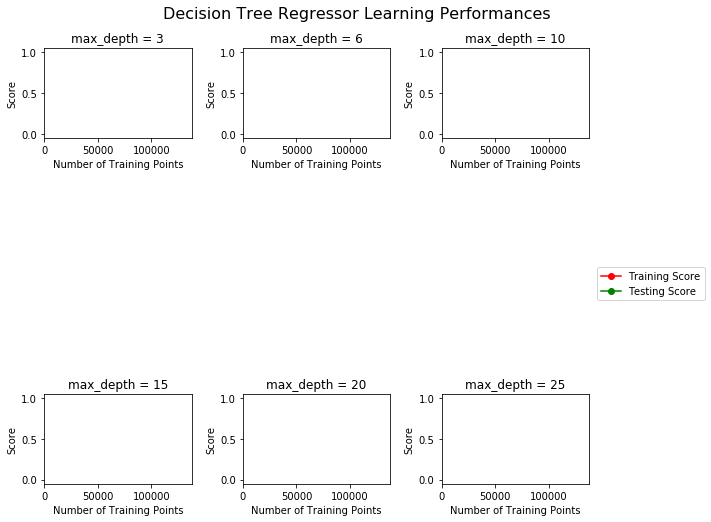

In [31]:
# Produce learning curves for varying training set sizes and maximum depths
vs.ModelLearning(feature_data, ETA)

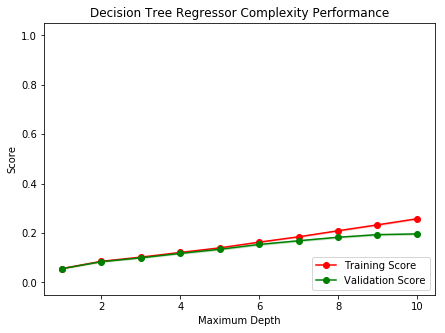

In [23]:
vs.ModelComplexity(X_train, y_train)